# Explore CBBR Request IDs

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.text as mpltext
from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm
# from matplotlib.ticker import MultipleLocator
# import itertools
import seaborn as sns

from difflib import SequenceMatcher

pd.set_option("display.max_columns", 80)
sns.set_style("whitegrid")

## Get versions FY2024 and FY2025

In [2]:
df_24_source = pd.read_csv(
    r"/Users/damonmccullough/github/data-engineering/.publishing/cbbr/FY2024/cbbr_export.csv"
)
df_24_source.insert(0, "version", "FY2024")
df_25_source = pd.read_csv(
    r"/Users/damonmccullough/github/data-engineering/.publishing/cbbr/FY2025/cbbr_export.csv"
)
df_25_source.insert(0, "version", "FY2025")

## Combine years

In [3]:
df_all_source = pd.concat([df_24_source, df_25_source])
df_all_source.value_counts(subset=["version"])

version
FY2024     3728
FY2025     3591
Name: count, dtype: int64

In [4]:
df_all_source.head()

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,need,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
0,FY2024,1697,217202413E,Brooklyn,3.0,17.0,317.0,BK 17,E,street,13,Transportation infrastructure,Improve trash removal and cleanliness,Dumping in the park. Need more employees to cl...,Site Name: Paerdegat Park,Paerdegat Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,3.0,This would require a larger expense budget.,geosupport_1B_place,0104000020E6100000010000000101000000E90E62670A...
1,FY2024,2100,304202443C,Manhattan,1.0,4.0,104.0,MN 04,C,,CS,Sewage and flooding,Provide a new or expanded park or amenity (i.e...,Continue to complete the design for a new park...,Street Name: 10th Ave Cross Street 1: West ...,NaN,10th Ave,10th Ave,West 48th St,West 48th St,47/48 Street Block Association,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_2_street_name,0104000020E610000001000000010100000058A2F96888...
2,FY2024,2291,308202408C,Manhattan,1.0,8.0,108.0,MN 08,C,,08,Community board facilities and staff,"Create a new, or renovate or upgrade an existi...",Provide funding for a ramp or other means of a...,Site Name: Yorkville Branch Library,Yorkville Branch Library,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,9.0,NYPL supports this project. It is currently in...,_dcp_facilities,0104000020E6100000010000000101000000DEF9DEC335...
3,FY2024,2309,308202417C,Manhattan,1.0,8.0,108.0,MN 08,C,,17,Traffic and traffic flow,Reconstruct or upgrade a park or amenity (i.e....,Fund the reconstruction of 24 Sycamore Park,Site Name: Twenty Four Sycamores Park,Twenty Four Sycamores Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E610000001000000010100000019AC38D55A...
4,FY2024,1499,216202410C,Brooklyn,3.0,16.0,316.0,BK 16,C,,10,NYPD facilities and equipment,Reconstruct streets,Broadway between Saratoga Avenue and Van Sinde...,Street Name: Broadway Cross Street 1: Sarat...,NaN,Broadway,Broadway,Saratoga Avenue,Saratoga Avenue,NaN,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,geosupport_2_street_name,0104000020E6100000010000000101000000E828643EC1...


## Clean and standardize

### Drop empty rows

In [5]:
df_all_source[df_all_source["request"].isna()]

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,need,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
1232,FY2024,3728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,site,NaN,"Park, buildings, and access improvements",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO LOCATION DATA,NaN


In [6]:
df_all = df_all_source[~df_all_source["request"].isna()]
df_all[df_all["request"].isna()]

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,need,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom


### Drop duplicate rows

There aren't any duplicate rows

In [7]:
df_all[df_all.duplicated(keep=False)]

,version,unique_id,tracking_code,borough,borough_code,cd,commdist,cb_label,type_br,type,priority,need,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,parent_tracking_code,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom


### Drop certain columns

Some columns do not reflect qualities of a unique request.

Requests with different values in these columns are the same request when all other column values are the same

`unique_id`: ...

`tracking_code`: ...

`parent_tracking_code`: ...

`priority`: ...

`need`: A single request can address more than one need. For example, requests to "Extend library hours" aren't distinct requests just because they're related to distinct needs like "Economic development programs" or "Library facilities, equipment and programs (NYPL)".

`type`: ...

In [8]:
non_request_columns = ["unique_id", "tracking_code", "parent_tracking_code", "priority", "type", "need"]
df_all = df_all.drop(columns=non_request_columns)
df_all.head()

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
0,FY2024,Brooklyn,3.0,17.0,317.0,BK 17,E,Improve trash removal and cleanliness,Dumping in the park. Need more employees to cl...,Site Name: Paerdegat Park,Paerdegat Park,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,3.0,This would require a larger expense budget.,geosupport_1B_place,0104000020E6100000010000000101000000E90E62670A...
1,FY2024,Manhattan,1.0,4.0,104.0,MN 04,C,Provide a new or expanded park or amenity (i.e...,Continue to complete the design for a new park...,Street Name: 10th Ave Cross Street 1: West ...,NaN,10th Ave,10th Ave,West 48th St,West 48th St,47/48 Street Block Association,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_2_street_name,0104000020E610000001000000010100000058A2F96888...
2,FY2024,Manhattan,1.0,8.0,108.0,MN 08,C,"Create a new, or renovate or upgrade an existi...",Provide funding for a ramp or other means of a...,Site Name: Yorkville Branch Library,Yorkville Branch Library,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,9.0,NYPL supports this project. It is currently in...,_dcp_facilities,0104000020E6100000010000000101000000DEF9DEC335...
3,FY2024,Manhattan,1.0,8.0,108.0,MN 08,C,Reconstruct or upgrade a park or amenity (i.e....,Fund the reconstruction of 24 Sycamore Park,Site Name: Twenty Four Sycamores Park,Twenty Four Sycamores Park,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,8.0,Contact the Community Board Unit at OMB for in...,geosupport_1B_place,0104000020E610000001000000010100000019AC38D55A...
4,FY2024,Brooklyn,3.0,16.0,316.0,BK 16,C,Reconstruct streets,Broadway between Saratoga Avenue and Van Sinde...,Street Name: Broadway Cross Street 1: Sarat...,NaN,Broadway,Broadway,Saratoga Avenue,Saratoga Avenue,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,geosupport_2_street_name,0104000020E6100000010000000101000000E828643EC1...


Now there are duplicate rows

In [9]:
df_all[df_all.duplicated(keep=False)].shape

(8, 23)

In [10]:
df_all[df_all.duplicated(keep=False)]

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom
1798,FY2024,Manhattan,1.0,9.0,109.0,MN 09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN
1813,FY2024,Manhattan,1.0,9.0,109.0,MN 09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN
2356,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,C,Reconstruct streets,"Request: Reconstruct Maspeth Avenue, from Vand...",Street Name: Maspeth Avenue Cross Street 1:...,NaN,Maspeth Avenue,Maspeth Avenue,Maspeth Avenue,Vandervoort Avenue,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,GEOCODING FAILED,NaN
2364,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,C,Reconstruct streets,"Request: Reconstruct Maspeth Avenue, from Vand...",Street Name: Maspeth Avenue Cross Street 1:...,NaN,Maspeth Avenue,Maspeth Avenue,Maspeth Avenue,Vandervoort Avenue,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,GEOCODING FAILED,NaN
668,FY2025,Manhattan,1.0,9.0,109.0,MN09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,NaN,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN
693,FY2025,Manhattan,1.0,9.0,109.0,MN09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,NaN,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN
712,FY2025,Manhattan,1.0,10.0,110.0,MN10,C,Renovate interior building component,"A gym divider (est. cost $15,000) will allow P...",NaN,NaN,NaN,NaN,NaN,NaN,"250 West 127 Street, Manhattan, New York, NY",NaN,DOE,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN
713,FY2025,Manhattan,1.0,10.0,110.0,MN10,C,Renovate interior building component,"A gym divider (est. cost $15,000) will allow P...",NaN,NaN,NaN,NaN,NaN,NaN,"250 West 127 Street, Manhattan, New York, NY",NaN,DOE,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN


### Standardize certain column values

#### `borough` -> `borough_clean`

In [11]:
df_all.value_counts(subset=["borough"])

borough      
Brooklyn         2143
Manhattan        1859
Queens           1793
Bronx            1293
SI                133
Staten Island      97
Name: count, dtype: int64

In [12]:
df_all["borough_clean"] = df_all["borough"].str.replace("SI", "Staten Island")
df_all.value_counts(subset=["borough_clean"])

borough_clean
Brooklyn         2143
Manhattan        1859
Queens           1793
Bronx            1293
Staten Island     230
Name: count, dtype: int64

#### `cb_label` -> `cb_label_clean`

In [13]:
df_all.value_counts(subset=["cb_label"])

cb_label
BK09        162
MN 12       140
MN01        125
MN09        119
MN 09       116
           ... 
BX02         22
BX 02        18
SI03         16
BX12         11
BX 12        11
Name: count, Length: 115, dtype: int64

In [14]:
df_all["cb_label_clean"] = df_all["cb_label"].str.replace(" ", "")
df_all.value_counts(subset=["cb_label_clean"])

cb_label_clean
BK09              278
MN12              253
MN09              235
MN01              229
BX09              217
MN04              204
QN01              196
QN02              186
BK13              175
QN04              166
BX04              153
BX08              153
QN03              150
BK15              149
QN08              146
BX05              146
BK03              142
BK07              134
BK02              131
MN05              130
MN02              128
BX07              128
MN11              127
BK17              126
BK11              125
QN10              125
BX10              124
BK08              123
SI01              122
MN10              122
QN07              119
QN05              118
BK10              118
MN06              118
MN03              116
QN14              110
QN12              110
BK01              109
BK18              108
QN06              105
QN11              101
MN08              100
MN07               97
QN09               94
BK05             

#### `explanation` -> `explanation_clean`

In [15]:
df_all.value_counts(subset=["explanation"])

explanation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
Although the speed limit has been reduced to 25 mph, motorists are still speeding throughout the district. Additional traffic enforcement cameras are necessary to alleviate this problem.                                                                                                                                                                                                                                            

Double, single, and lack of spaces between words

In [16]:
df_all["explanation_clean"] = df_all["explanation"].str.replace(" ", "")
df_all.value_counts(subset=["explanation_clean"], dropna=False)

explanation_clean                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
NaN                                                                                                                                                                                                                                                                                                                                         

Punctuation

In [17]:
df_all["explanation_clean"] = df_all["explanation_clean"].str.replace(".", "")
df_all.value_counts(subset=["explanation_clean"], dropna=False)

explanation_clean                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
NaN                                                                                                                                                                                                                                                                                                                                             

Nonsense values

In [18]:
df_all[df_all["explanation_clean"].str.len() < 20]

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean
595,FY2024,Bronx,2.0,9.0,209.0,BX 09,E,Funding for a new senior center program,Senior center desired,Site Name: Sonia Sotomayor Center; Street Na...,Sonia Sotomayor Center,"1000 Rosedale Avenue, Bronx, New York, NY",Rosedale Avenue,NaN,NaN,NaN,NaN,DFTA,125.0,7.0,More information is needed from the community ...,geosupport_1B_address,0104000020E6100000010000000101000000102BA6EA7F...,Bronx,BX09,Seniorcenterdesired
1674,FY2024,Manhattan,1.0,5.0,105.0,MN 05,C,Reconstruct streets,Widen 8th ave,Street Name: 8th ave Cross Street 1: 34th s...,NaN,8th ave,8th ave,34th st,40th st,Garment District Alliance,NaN,DOT,841.0,1.0,NYC DOT completed this project with an in-hous...,GEOCODING FAILED,NaN,Manhattan,MN05,Widen8thave
2135,FY2024,Bronx,2.0,6.0,206.0,BX 06,C,Provide more housing for seniors,More senior housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HPD,806.0,3.0,The agency will accommodate this issue within ...,NO LOCATION DATA,NaN,Bronx,BX06,Moreseniorhousing
3580,FY2024,Queens,4.0,13.0,413.0,QN 13,C,"Roadway maintenance (i.e. pothole repair, resu...",Repave Roadway.,Street Name: 134 Road Cross Street 1: 217 S...,NaN,134 Road,Road,217 Street,220 Street,Federated Blocks of Laurelton,NaN,DOT,841.0,7.0,Resurfacing and milling requests should be dir...,GEOCODING FAILED,NaN,Queens,QN13,RepaveRoadway
3592,FY2024,Queens,4.0,13.0,413.0,QN 13,C,"Roadway maintenance (i.e. pothole repair, resu...",Repave roadway.,Street Name: 147 Avenue Cross Street 1: Fra...,NaN,147 Avenue,Avenue,Francis Lewis Boulevard,Memphis Avenue,Rosedale Civic Association,NaN,DOT,841.0,7.0,The agency will accommodate this issue within ...,GEOCODING FAILED,NaN,Queens,QN13,Repaveroadway
3597,FY2024,Queens,4.0,13.0,413.0,QN 13,C,"Roadway maintenance (i.e. pothole repair, resu...",Repave bumpy roadway.,Street Name: Grand Central Parkway Service Roa...,NaN,Grand Central Parkway Service Road,Central Parkway Service Road,Little Neck Parkway,Nassau County Line,North Shore Towers,Royal Ranch Civic Association,DOT,841.0,7.0,Resurfacing and milling requests should be dir...,GEOCODING FAILED,NaN,Queens,QN13,Repavebumpyroadway
1083,FY2025,Bronx,2.0,6.0,206.0,BX06,C,Provide more housing for seniors,More senior housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HPD,NaN,3.0,The agency will try to accommodate this issue ...,NO LOCATION DATA,NaN,Bronx,BX06,Moreseniorhousing
1225,FY2025,Bronx,2.0,9.0,209.0,BX09,C,Provide a new or expanded park or amenity (i.e...,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Bronx,BX09,#NAME?
2047,FY2025,Brooklyn,3.0,4.0,304.0,BK04,C,Inspect sanitary sewer on specific street segm...,Extreme weather,Street Name: Wilson Avenue Cross Street 1: ...,NaN,Wilson Avenue,Wilson Avenue,Myrtle Avenue,Halsey Street,NaN,NaN,DEP,NaN,8.0,Please contact the Agency directly and promptl...,GEOCODING FAILED,NaN,Brooklyn,BK04,Extremeweather
2667,FY2025,Queens,4.0,13.0,413.0,QN13,C,"Roadway maintenance (resurfacing, trench resto...",Repave bumpy roadway.,Street Name: Grand Central Parkway Service Roa...,NaN,Grand Central Parkway Service Road,Central Parkway Service Road,Little Neck Parkway,Little Neck Parkway,North Shore Towers,Royal Ranch Civic Association,DOT,NaN,3.0,Funds are unavailable for this project. We re...,GEOCODING FAILED,NaN,Queens,QN13,Repavebumpyroadway


In [19]:
df_all["explanation_clean"] = df_all["explanation_clean"].replace("#NAME?", np.nan)
df_all.value_counts(subset=["explanation_clean"], dropna=False)

explanation_clean                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
NaN                                                                                                                                                                                                                                                                                                                                             

### Drop duplicate records

In [20]:
df_all[df_all.duplicated(keep=False)].shape

(8, 26)

In [21]:
df_all[df_all.duplicated(keep=False)]

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean
1798,FY2024,Manhattan,1.0,9.0,109.0,MN 09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN,Manhattan,MN09,IncreaseNYPLfundingtoprovideinitiativessuchaso...
1813,FY2024,Manhattan,1.0,9.0,109.0,MN 09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,37.0,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN,Manhattan,MN09,IncreaseNYPLfundingtoprovideinitiativessuchaso...
2356,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,C,Reconstruct streets,"Request: Reconstruct Maspeth Avenue, from Vand...",Street Name: Maspeth Avenue Cross Street 1:...,NaN,Maspeth Avenue,Maspeth Avenue,Maspeth Avenue,Vandervoort Avenue,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,GEOCODING FAILED,NaN,Brooklyn,BK01,"Request:ReconstructMaspethAvenue,fromVandervoo..."
2364,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,C,Reconstruct streets,"Request: Reconstruct Maspeth Avenue, from Vand...",Street Name: Maspeth Avenue Cross Street 1:...,NaN,Maspeth Avenue,Maspeth Avenue,Maspeth Avenue,Vandervoort Avenue,NaN,NaN,DOT,841.0,8.0,Further study by the agency of this request is...,GEOCODING FAILED,NaN,Brooklyn,BK01,"Request:ReconstructMaspethAvenue,fromVandervoo..."
668,FY2025,Manhattan,1.0,9.0,109.0,MN09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,NaN,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN,Manhattan,MN09,IncreaseNYPLfundingtoprovideinitiativessuchaso...
693,FY2025,Manhattan,1.0,9.0,109.0,MN09,E,"Extend library hours, expand library programs,...",Increase NYPL funding to provide initiatives s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPL,NaN,3.0,NYPL is in favor of this project but added or ...,NO LOCATION DATA,NaN,Manhattan,MN09,IncreaseNYPLfundingtoprovideinitiativessuchaso...
712,FY2025,Manhattan,1.0,10.0,110.0,MN10,C,Renovate interior building component,"A gym divider (est. cost $15,000) will allow P...",NaN,NaN,NaN,NaN,NaN,NaN,"250 West 127 Street, Manhattan, New York, NY",NaN,DOE,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Manhattan,MN10,"Agymdivider(estcost$15,000)willallowPS154tosha..."
713,FY2025,Manhattan,1.0,10.0,110.0,MN10,C,Renovate interior building component,"A gym divider (est. cost $15,000) will allow P...",NaN,NaN,NaN,NaN,NaN,NaN,"250 West 127 Street, Manhattan, New York, NY",NaN,DOE,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Manhattan,MN10,"Agymdivider(estcost$15,000)willallowPS154tosha..."


In [22]:
df_all = df_all.drop_duplicates()
df_all[df_all.duplicated(keep=False)]

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean


## Determine the Request ID

There is no column with IDs for Community Board budget requests across multiple versions of the data.

Inspecting the data can inform the creation of a Request ID.

### Investigate common values

In [23]:
def common_values(data_a: pd.DataFrame, data_b: pd.DataFrame, column_name: str) -> list:
    values_a = data_a[column_name].dropna().unique()
    values_b = data_b[column_name].dropna().unique()
    return sorted(list(set(values_a).intersection(values_b)))


def uncommon_values(
    data_a: pd.DataFrame, data_b: pd.DataFrame, column_name: str
) -> list:
    values_a = data_a[column_name].dropna().unique()
    values_b = data_b[column_name].dropna().unique()
    return sorted(list(set(values_a).symmetric_difference(values_b)))


def summarize_common_values(data_a, data_b) -> pd.DataFrame:
    df_common_value_counts = pd.DataFrame(
        columns=[
            "column_name",
            "common_value_counts",
            "uncommon_value_counts",
            "common_value_percent",
            "common_values",
            "uncommon_values",
        ]
    )

    for column in df_all.columns:
        common = common_values(data_a, data_b, column)
        uncommon = uncommon_values(data_a, data_b, column)
        df_new = pd.DataFrame(
            [
                [
                    column,
                    len(common),
                    len(uncommon),
                    round(
                        (
                            1
                            if len(uncommon) == 0
                            else len(common) / (len(common) + len(uncommon))
                        )
                        * 100
                    ),
                    common,
                    uncommon,
                ]
            ],
            columns=df_common_value_counts.columns,
        )
        df_common_value_counts = pd.concat([df_common_value_counts, df_new])
    df_common_value_counts = df_common_value_counts.sort_values(
        by="column_name", ascending=True
    ).reset_index(drop=True)
    return df_common_value_counts

In [24]:
df_2024 = df_all[df_all["version"] == "FY2024"]
df_2025 = df_all[df_all["version"] == "FY2025"]

In [25]:
common_values_summary = summarize_common_values(df_2024, df_2025)
common_values_summary

,column_name,common_value_counts,uncommon_value_counts,common_value_percent,common_values,uncommon_values
0,address,524,355,60,"[1 Eton Place, 1 South Street, Manhattan, New ...","[1 Clarkson Street, NY, NY 10014, 1 Pace Plaza..."
1,agency,0,35,0,[],"[2.0, 5.0, 30.0, 31.0, 37.0, 38.0, 39.0, 40.0,..."
2,agency_acronym,34,1,97,"[ACS, BPL, CEOM, DCA, DCAS, DCLA, DCP, DEP, DF...",[CUNY]
3,agency_category_response,10,0,100,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",[]
4,agency_response,201,218,48,[A comprehensive city-wide ADA renovation proj...,"[988 is a connection to free, confidential cri..."
5,borough,4,2,67,"[Bronx, Brooklyn, Manhattan, Queens]","[SI, Staten Island]"
6,borough_clean,5,0,100,"[Bronx, Brooklyn, Manhattan, Queens, Staten Is...",[]
7,borough_code,4,1,80,"[1.0, 2.0, 3.0, 4.0]",[5.0]
8,cb_label,0,115,0,[],"[BK 01, BK 02, BK 03, BK 04, BK 05, BK 06, BK ..."
9,cb_label_clean,56,3,95,"[BK01, BK02, BK03, BK04, BK05, BK07, BK08, BK0...","[BK06, BK12, BK16]"


In [26]:
common_values_summary.sort_values(["common_value_percent", "common_value_counts"], ascending=False)

,column_name,common_value_counts,uncommon_value_counts,common_value_percent,common_values,uncommon_values
3,agency_category_response,10,0,100,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",[]
14,geo_function,9,0,100,"[GEOCODING FAILED, LOCATION IS DISTRICT WIDE, ...",[]
6,borough_clean,5,0,100,"[Bronx, Brooklyn, Manhattan, Queens, Staten Is...",[]
24,type_br,2,0,100,"[C, E]",[]
2,agency_acronym,34,1,97,"[ACS, BPL, CEOM, DCA, DCAS, DCLA, DCP, DEP, DF...",[CUNY]
9,cb_label_clean,56,3,95,"[BK01, BK02, BK03, BK04, BK05, BK07, BK08, BK0...","[BK06, BK12, BK16]"
10,cd,17,1,94,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",[16.0]
11,commdist,53,6,90,"[101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107...","[306.0, 312.0, 316.0, 501.0, 502.0, 503.0]"
17,request,308,67,82,"[Add NYPD parking facilities, Add street signa...","[As needed Land use planning, technical and ur..."
7,borough_code,4,1,80,"[1.0, 2.0, 3.0, 4.0]",[5.0]


### Investigate interesting columns

Some columns have a lot of values common across both years: `explanation_clean`, `request`, `location`

In [27]:
df_all.value_counts(["cb_label_clean"], dropna=False).reset_index().sort_values(by="cb_label_clean")

,cb_label_clean,count
37,BK01,108
18,BK02,131
16,BK03,142
48,BK04,73
44,BK05,93
53,BK06,59
17,BK07,134
27,BK08,123
0,BK09,278
32,BK10,118


In [28]:
df_all.value_counts(["request"], dropna=False).reset_index()

,request,count
0,Reconstruct or upgrade a park or amenity (i.e....,494
1,Reconstruct streets,226
2,"Improve traffic and pedestrian safety, includi...",206
3,Other capital budget request for DEP,145
4,Provide a new or expanded park or amenity (i.e...,130
...,...,...
370,Promote vaccinations and immunizations,1
371,"Renovate, upgrade, or expand ACS sites that pr...",1
372,Create or promote programs to destigmatize dev...,1
373,Planning support for previously approved land ...,1


In [29]:
vr_group = df_all.groupby(["version", "borough_code", "borough_clean"], dropna=False).agg(
    count=("borough_clean", "size"),
)
vr_group

count
version borough_code borough_clean       
FY2024  1.0          Manhattan        920
        2.0          Bronx            632
        3.0          Brooklyn        1149
        4.0          Queens           891
        5.0          Staten Island    133
FY2025  1.0          Manhattan        936
        2.0          Bronx            661
        3.0          Brooklyn         993
        4.0          Queens           902
        NaN          Staten Island     97

In [30]:
vr_group = df_all.groupby(["version", "request"], dropna=False).agg(
    count=("request", "size"),
)
vr_group

count
version request                                                  
FY2024  Add NYPD parking facilities                             7
        Add street signage or wayfinding elements               3
        Address illegal conversions and uses of buildings       6
        Address traffic congestion                             10
        Allocate funds for outreach services to homebou...      6
...                                                           ...
FY2025  Upgrade existing facilities for the homeless            7
        Upgrade or create new greenways                        11
        Upgrade or create new plazas                            8
        Upgrade or provide new Select Bus Service (SBS)...      2
        Upgrade the emergency response system                   1

[683 rows x 1 columns]

In [31]:
df_all.value_counts(["explanation_clean"], dropna=False).reset_index()

,explanation_clean,count
0,NaN,20
1,"Althoughthespeedlimithasbeenreducedto25mph,mot...",8
2,Thethree-yearwaittimeperiodforspeedhumpinstall...,8
3,StreetLightingneedsupgradingornewinstallationa...,8
4,"Providefundstoinstallnewroofs,windows,doors,fi...",6
...,...,...
5028,ParksEnforcementPatrol(PEP)providesauniformedp...,1
5029,ParksEquipment:Seriousandincreasingtrashcondit...,1
5030,DEPwilltrytoaccommodatethisissuewithinexisting...,1
5031,DEP:Sufficientfundsarerequestedfortheareawidei...,1


In [32]:
df_all.value_counts(["location"], dropna=False).reset_index()

,location,count
0,NaN,4788
1,Street Name: District Wide,23
2,Site Name: Flushing Meadows Corona Park,12
3,Site Name: Crotona Park,8
4,Site Name: P.O. Edward Byrne Park,6
...,...,...
1507,Street Name: 150th Street from 12th Ave to th...,1
1508,"Site Name: 6th Ave, Bleecker - 14th St & Washi...",1
1509,Street Name: 158th St Cross Street 1: River...,1
1510,Site Name: 6th Avenue; Crosby Street,1


### A good compound key might be `cb_label_clean` + `request` + `location`

In [33]:
maybe_compound_key_columns = ["cb_label_clean", "request", "location"]

In [34]:
df_all[df_all.duplicated(subset=maybe_compound_key_columns)].shape

(3325, 26)

In [35]:
df_all.value_counts(maybe_compound_key_columns).reset_index()

,cb_label_clean,request,location,count
0,BX07,Reconstruct or upgrade a park or amenity (i.e....,Site Name: Devoe Park,6
1,BK09,"Improve traffic and pedestrian safety, includi...",Street Name: Parkside Avenue Cross Street 1...,4
2,MN06,"Provide a new, or new expansion to, a building...","Site Name: Murphy; Street Name: Avenue C, Ma...",4
3,MN03,Provide a new or expanded park or amenity (i.e...,Site Name: Sara Delano Roosevelt Park,4
4,BX09,Reconstruct or upgrade a park or amenity (i.e....,Site Name: Soundview Park,4
...,...,...,...,...
1626,BX11,"Improve traffic and pedestrian safety, includi...",Street Name: Adams Street Cross Street 1: G...,1
1627,BX11,"Improve traffic and pedestrian safety, includi...",Street Name: Astor Avenue between Wallace and ...,1
1628,BX11,"Improve traffic and pedestrian safety, includi...",Street Name: Van Nest Cross Street 1: Adams...,1
1629,BX11,Improve trash removal and cleanliness,Street Name: Bronx Park East Cross Street 1...,1


In [36]:
df_all.value_counts(["version"] + maybe_compound_key_columns).reset_index()

,version,cb_label_clean,request,location,count
0,FY2024,MN10,Other public housing upgrades or renovations r...,Site Name: St. Nicholas Houses,3
1,FY2024,BX07,Reconstruct or upgrade a park or amenity (i.e....,Site Name: Devoe Park,3
2,FY2025,BX07,Reconstruct or upgrade a park or amenity (i.e....,Site Name: Devoe Park,3
3,FY2024,MN10,Other capital budget request for NYPL,Site Name: Countee Cullen Library; Street Na...,2
4,FY2025,MN06,"Provide a new, or new expansion to, a building...","Site Name: Murphy; Street Name: Avenue C, Ma...",2
...,...,...,...,...,...
2484,FY2024,MN07,Improve access to a park or amenity (i.e. play...,Site Name: Riverside Park North,1
2485,FY2024,MN07,"Other requests for park, building, or access i...",Site Name: Riverside Park North,1
2486,FY2024,MN07,"Provide a new, or new expansion to, a building...",Site Name: Riverside Park South,1
2487,FY2024,MN07,Provide new bike lanes,Street Name: West 72nd Street Cross Street ...,1


In [37]:
maybe_compound_key_columns_value_counts = df_all.value_counts(["version"] + maybe_compound_key_columns).reset_index()
maybe_compound_key_columns_value_counts[maybe_compound_key_columns_value_counts["count"] > 1]

,version,cb_label_clean,request,location,count
0,FY2024,MN10,Other public housing upgrades or renovations r...,Site Name: St. Nicholas Houses,3
1,FY2024,BX07,Reconstruct or upgrade a park or amenity (i.e....,Site Name: Devoe Park,3
2,FY2025,BX07,Reconstruct or upgrade a park or amenity (i.e....,Site Name: Devoe Park,3
3,FY2024,MN10,Other capital budget request for NYPL,Site Name: Countee Cullen Library; Street Na...,2
4,FY2025,MN06,"Provide a new, or new expansion to, a building...","Site Name: Murphy; Street Name: Avenue C, Ma...",2
5,FY2024,BK11,Reconstruct or upgrade a park or amenity (i.e....,Street Name: Shore Parkway Promenade Cross ...,2
6,FY2024,MN03,Reconstruct or upgrade a park or amenity (i.e....,Site Name: Seward Park,2
7,FY2025,MN10,Other capital budget request for NYPL,Site Name: Countee Cullen Library; Street Na...,2
8,FY2025,BK10,Reconstruct or upgrade a park or amenity (i.e....,Site Name: Dyker Beach Park,2
9,FY2024,BK09,"Improve traffic and pedestrian safety, includi...",Street Name: Parkside Avenue Cross Street 1...,2


In [38]:
maybe_compound_key_columns_value_counts_version_duplicates = df_all[df_all.duplicated(subset=["version"] + maybe_compound_key_columns, keep=False)].sort_values(by=["version"] + maybe_compound_key_columns)
maybe_compound_key_columns_value_counts_version_duplicates

,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean
876,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Other affordable housing programs requests,Reinstate funding for the Greenpoint ? William...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HPD,806.0,9.0,This request is not recommended for funding.,NO LOCATION DATA,NaN,Brooklyn,BK01,ReinstatefundingfortheGreenpoint?WilliamsburgT...
2347,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Other affordable housing programs requests,Request: Create a New Fund for the Affordable ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HPD,806.0,9.0,This request is not recommended for funding.,NO LOCATION DATA,NaN,Brooklyn,BK01,Request:CreateaNewFundfortheAffordableHousinga...
2366,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Other affordable housing programs requests,Increase allocation for rehabilitation loan pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HPD,806.0,2.0,The agency will accommodate this issue within ...,NO LOCATION DATA,NaN,Brooklyn,BK01,Increaseallocationforrehabilitationloanprogram...
2342,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Other programs to address public health issues...,Request: Increase the staffing of outreach pro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOHMH,816.0,3.0,DOHMH manages a variety of HIV programs that i...,NO LOCATION DATA,NaN,Brooklyn,BK01,Request:Increasethestaffingofoutreachprogramst...
2353,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Other programs to address public health issues...,Request: Fund Comprehensive Study of Environme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOHMH,816.0,3.0,DOHMH has conducted studies in CB1 to evaluate...,NO LOCATION DATA,NaN,Brooklyn,BK01,Request:FundComprehensiveStudyofEnvironmentalH...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,FY2025,Staten Island,NaN,3.0,NaN,SI03,C,Other capital budget request for DEP,Amend DEP?s storm water drainage map to includ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEP,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Staten Island,SI03,AmendDEP?sstormwaterdrainagemaptoincludestreet...
133,FY2025,Staten Island,NaN,3.0,NaN,SI03,C,Other capital budget request for DEP,Amend DEP?s storm water drainage map to includ...,NaN,NaN,NaN,NaN,NaN,NaN,Complaint driven,NaN,DEP,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Staten Island,SI03,AmendDEP?sstormwaterdrainagemaptoincludeStorer...
134,FY2025,Staten Island,NaN,3.0,NaN,SI03,C,Other capital budget request for DEP,Request storm sewer/basin intersection of Albo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEP,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Staten Island,SI03,Requeststormsewer/basinintersectionofAlbourne&...
139,FY2025,Staten Island,NaN,3.0,NaN,SI03,C,"Provide new emergency vehicles, such as fire t...",The purchase of an MARR vehicle will allow mut...,NaN,NaN,NaN,NaN,NaN,NaN,123 Precinct,NaN,FDNY,NaN,8.0,Approval of this request depends on sufficient...,NO LOCATION DATA,NaN,Staten Island,SI03,ThepurchaseofanMARRvehiclewillallowmutualaidra...


In [39]:
maybe_compound_key_columns_value_counts_version_duplicates.iloc[:2][["version"] + maybe_compound_key_columns + ["explanation"]]

,version,cb_label_clean,request,location,explanation
876,FY2024,BK01,Other affordable housing programs requests,NaN,Reinstate funding for the Greenpoint ? William...
2347,FY2024,BK01,Other affordable housing programs requests,NaN,Request: Create a New Fund for the Affordable ...


These columns are not a great compound key. Within a single year, the `explanation` column has details which describe distinct requests.

### A good compound key is `cb_label_clean` + `request` + `explanation_clean` + `location`

In [40]:
compound_key_columns = ["cb_label_clean", "request", "explanation_clean", "location"]

In [41]:
df_all.shape

(7314, 26)

In [42]:
df_all[df_all.duplicated()].shape

(0, 26)

In [43]:
df_all[df_all.duplicated(subset=compound_key_columns)].shape

(2009, 26)

Many requests have the same Request ID

## Add Request ID column

In [44]:
def add_compound_key(
    data: pd.DataFrame, column: str, columns: list[str]
) -> pd.DataFrame:
    data = data.copy()
    data[column] = data.apply(
        lambda x: "|".join(x[columns].dropna().astype(str).values), axis=1
    )
    return data[[column] + [col for col in data.columns if col != column]]

In [45]:
request_id_column = "request_id"

In [46]:
df_all = add_compound_key(
    df_all, request_id_column, compound_key_columns
)

## Review Request IDs

In [47]:
df_all.value_counts(request_id_column).reset_index()

,request_id,count
0,QN12|Reconstruct streets|Additionalprojectstha...,4
1,BX01|Renovate or upgrade an elementary school|...,2
2,"BK18|Other requests for park, building, or acc...",2
3,BK18|Reconstruct streets|ReconstructAvenueNRoa...,2
4,BK18|Reconstruct streets|ReconstructAvenueHroa...,2
...,...,...
5300,BX11|Invest in infrastructure that will suppor...,1
5301,BX11|Other affordable housing programs request...,1
5302,BX11|Other capital budget request for DEP|With...,1
5303,BX11|Other capital budget request for DYCD,1


In [48]:
df_all.value_counts(["version", request_id_column]).reset_index()

,version,request_id,count
0,FY2024,QN12|Reconstruct streets|Additionalprojectstha...,2
1,FY2025,QN12|Reconstruct streets|Additionalprojectstha...,2
2,FY2024,BK01|Address traffic congestion|Request:Increa...,1
3,FY2025,"BX04|Provide, expand, or enhance job training|...",1
4,FY2025,BX04|Reconstruct or upgrade a park or amenity ...,1
...,...,...,...
7307,FY2024,MN09|Renovate or upgrade an existing cultural ...,1
7308,FY2024,MN09|Renovate or upgrade an existing cultural ...,1
7309,FY2024,MN09|Renovate or upgrade a senior center|Provi...,1
7310,FY2024,MN09|Renovate or upgrade a senior center|Provi...,1


In [49]:
df_all[df_all.duplicated(request_id_column, keep=False)].sort_values(by=[request_id_column, "version"])

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean
2361,BK01|Assign additional building inspectors (in...,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Assign additional building inspectors (includi...,The number of building inspectors should incre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOB,810.0,7.0,More information is needed from the community ...,NO LOCATION DATA,NaN,Brooklyn,BK01,Thenumberofbuildinginspectorsshouldincreaseinp...
1436,BK01|Assign additional building inspectors (in...,FY2025,Brooklyn,3.0,1.0,301.0,BK01,E,Assign additional building inspectors (includi...,The number of building inspectors should incre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOB,NaN,5.0,The agency will accommodate this issue within ...,NO LOCATION DATA,NaN,Brooklyn,BK01,Thenumberofbuildinginspectorsshouldincreaseinp...
1091,BK01|Clean catch basins|Catchbasincleaningshou...,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Clean catch basins,Catch basin cleaning should be maintained and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEP,826.0,7.0,The agency will accommodate this issue within ...,NO LOCATION DATA,NaN,Brooklyn,BK01,Catchbasincleaningshouldbemaintainedandincreas...
1464,BK01|Clean catch basins|Catchbasincleaningshou...,FY2025,Brooklyn,3.0,1.0,301.0,BK01,E,Clean catch basins,Catch basin cleaning should be maintained and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEP,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Brooklyn,BK01,Catchbasincleaningshouldbemaintainedandincreas...
189,BK01|Enhance park safety through more security...,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Enhance park safety through more security staf...,Request: Expand Park Enforcement Patrol Projec...,Site Name: Mccarren Park,Mccarren Park,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,3.0,This would require a larger expense budget.,geosupport_1B_place,0104000020E6100000010000000101000000683EE76ED7...,Brooklyn,BK01,Request:ExpandParkEnforcementPatrolProjecttoIn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,SI03|Provide surveillance (Argus) cameras|Addi...,FY2025,Staten Island,NaN,3.0,NaN,SI03,C,Provide surveillance (Argus) cameras,Additional ARGUS cameras are needed to monitor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,3.0,Argus cameras are funded via allocations from ...,NO LOCATION DATA,NaN,Staten Island,SI03,AdditionalARGUScamerasareneededtomonitorneighb...
733,SI03|Reconstruct or upgrade a building in a pa...,FY2024,SI,5.0,3.0,503.0,SI 03,C,Reconstruct or upgrade a building in a park,Olmstead Beil House requires stabilization and...,Site Name: Olmsted Beil House Park; Street N...,Olmsted Beil House Park,"4515 Hylan Boulevard, Staten Island, New York, NY",Hylan Boulevard,NaN,NaN,NaN,NaN,DPR,846.0,5.0,This request cannot be funded in FY 2024. Resu...,geosupport_1B_address,0104000020E61000000100000001010000003EA06F611E...,Staten Island,SI03,OlmsteadBeilHouserequiresstabilizationandrenov...
136,SI03|Reconstruct or upgrade a building in a pa...,FY2025,Staten Island,NaN,3.0,NaN,SI03,C,Reconstruct or upgrade a building in a park,Olmstead Beil House requires stabilization and...,Site Name: Olmsted Beil House Park; Street N...,Olmsted Beil House Park,"4515 Hylan Boulevard, Staten Island, New York, NY",Hylan Boulevard,NaN,NaN,NaN,NaN,DPR,NaN,5.0,Capital funds are allocated for specific proje...,GEOCODING FAILED,NaN,Staten Island,SI03,OlmsteadBeilHouserequiresstabilizationandrenov...
462,SI03|Reconstruct streets|Allocatefundsforrecon...,FY2024,SI,5.0,3.0,503.0,SI 03,C,Reconstruct streets,Allocate funds for reconstruction and widening...,Street Name: Huguenot Avenue Cross Street 1...,NaN,Huguenot Avenue,Huguenot Avenue,Rathbun Avenue,Rathbun Avenue,NaN,NaN,DOT,841.0,8.0,The ag

### Review repeat requests within each year

In [50]:
df_all[df_all.duplicated()]

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean


In [51]:
df_all[df_all.duplicated([request_id_column, "version"], keep=False)].sort_values(by=[request_id_column, "version"])

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean
1138,QN12|Reconstruct streets|Additionalprojectstha...,FY2024,Queens,4.0,12.0,412.0,QN 12,C,Reconstruct streets,Additional projects that are designed to addre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,7.0,Please contact the Borough Commissioner's offi...,NO LOCATION DATA,NaN,Queens,QN12,Additionalprojectsthataredesignedtoaddressfloo...
1353,QN12|Reconstruct streets|Additionalprojectstha...,FY2024,Queens,4.0,12.0,412.0,QN 12,C,Reconstruct streets,Additional projects that are designed to addre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,841.0,7.0,Please contact the Borough Commissioner's offi...,NO LOCATION DATA,NaN,Queens,QN12,Additionalprojectsthataredesignedtoaddressfloo...
8,QN12|Reconstruct streets|Additionalprojectstha...,FY2025,Queens,4.0,12.0,412.0,QN12,C,Reconstruct streets,Additional projects that are designed to addre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,7.0,Please contact the Borough Commissioner with t...,NO LOCATION DATA,NaN,Queens,QN12,Additionalprojectsthataredesignedtoaddressfloo...
37,QN12|Reconstruct streets|Additionalprojectstha...,FY2025,Queens,4.0,12.0,412.0,QN12,C,Reconstruct streets,Additional projects that are designed to addre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOT,NaN,7.0,Please contact the Borough Commissioner with t...,NO LOCATION DATA,NaN,Queens,QN12,Additionalprojectsthataredesignedtoaddressfloo...


## Drop repeat requests within each year

In [52]:
df_all = df_all.drop_duplicates(subset=[request_id_column, "version"]).reset_index(drop=True).sort_values(by=[request_id_column, "version"], ascending=False)
df_all[df_all.duplicated([request_id_column, "version"], keep=False)]

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean


## Add repeat request column

A request can't be a repeat in the first year that it appears

In [53]:
repeat_request_column = "is_repeat"

df_all[repeat_request_column] = df_all.duplicated(request_id_column, keep="last")
df_all[df_all.duplicated(request_id_column, keep=False)].sort_values(by=[request_id_column, "version"])

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean,is_repeat
2358,BK01|Assign additional building inspectors (in...,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Assign additional building inspectors (includi...,The number of building inspectors should incre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOB,810.0,7.0,More information is needed from the community ...,NO LOCATION DATA,NaN,Brooklyn,BK01,Thenumberofbuildinginspectorsshouldincreaseinp...,False
5157,BK01|Assign additional building inspectors (in...,FY2025,Brooklyn,3.0,1.0,301.0,BK01,E,Assign additional building inspectors (includi...,The number of building inspectors should incre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOB,NaN,5.0,The agency will accommodate this issue within ...,NO LOCATION DATA,NaN,Brooklyn,BK01,Thenumberofbuildinginspectorsshouldincreaseinp...,True
1091,BK01|Clean catch basins|Catchbasincleaningshou...,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Clean catch basins,Catch basin cleaning should be maintained and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEP,826.0,7.0,The agency will accommodate this issue within ...,NO LOCATION DATA,NaN,Brooklyn,BK01,Catchbasincleaningshouldbemaintainedandincreas...,False
5185,BK01|Clean catch basins|Catchbasincleaningshou...,FY2025,Brooklyn,3.0,1.0,301.0,BK01,E,Clean catch basins,Catch basin cleaning should be maintained and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEP,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Brooklyn,BK01,Catchbasincleaningshouldbemaintainedandincreas...,True
189,BK01|Enhance park safety through more security...,FY2024,Brooklyn,3.0,1.0,301.0,BK 01,E,Enhance park safety through more security staf...,Request: Expand Park Enforcement Patrol Projec...,Site Name: Mccarren Park,Mccarren Park,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,3.0,This would require a larger expense budget.,geosupport_1B_place,0104000020E6100000010000000101000000683EE76ED7...,Brooklyn,BK01,Request:ExpandParkEnforcementPatrolProjecttoIn...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,SI03|Provide surveillance (Argus) cameras|Addi...,FY2025,Staten Island,NaN,3.0,NaN,SI03,C,Provide surveillance (Argus) cameras,Additional ARGUS cameras are needed to monitor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,NaN,3.0,Argus cameras are funded via allocations from ...,NO LOCATION DATA,NaN,Staten Island,SI03,AdditionalARGUScamerasareneededtomonitorneighb...,True
733,SI03|Reconstruct or upgrade a building in a pa...,FY2024,SI,5.0,3.0,503.0,SI 03,C,Reconstruct or upgrade a building in a park,Olmstead Beil House requires stabilization and...,Site Name: Olmsted Beil House Park; Street N...,Olmsted Beil House Park,"4515 Hylan Boulevard, Staten Island, New York, NY",Hylan Boulevard,NaN,NaN,NaN,NaN,DPR,846.0,5.0,This request cannot be funded in FY 2024. Resu...,geosupport_1B_address,0104000020E61000000100000001010000003EA06F611E...,Staten Island,SI03,OlmsteadBeilHouserequiresstabilizationandrenov...,False
3859,SI03|Reconstruct or upgrade a building in a pa...,FY2025,Staten Island,NaN,3.0,NaN,SI03,C,Reconstruct or upgrade a building in a park,Olmstead Beil House requires stabilization and...,Site Name: Olmsted Beil House Park; Street N...,Olmsted Beil House Park,"4515 Hylan Boulevard, Staten Island, New York, NY",Hylan Boulevard,NaN,NaN,NaN,NaN,DPR,NaN,5.0,Capital funds are allocated for specific proje...,GEOCODING FAILED,NaN,Staten Island,SI03,OlmsteadBeilHouserequiresstabilizationandrenov...,True
462,SI03|Reconstruct streets|Allocatefundsforrecon...,FY2024,SI,5.0,3.0,503.0,SI 03,C,Reconstruct streets,Allocate funds for reconstruction and widening...,Street Name: Huguenot Avenue Cross Street 1...,NaN,Huguenot Avenue,Huguenot Avenu

In [54]:
df_all[df_all[repeat_request_column] & (df_all["version"] == "FY2024")]

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean,is_repeat


## Review CB request patterns

Bronx Community Board 12 made zero repeat requests

In [55]:
df_all[df_all["cb_label_clean"] == "BX12"].sort_values("request_id")

,request_id,version,borough,borough_code,cd,commdist,cb_label,type_br,request,explanation,location,site_name,address,street_name,street_cross_1,street_cross_2,supporters_1,supporters_2,agency_acronym,agency,agency_category_response,agency_response,geo_function,geom,borough_clean,cb_label_clean,explanation_clean,is_repeat
5042,BX12|Enhance park safety through design interv...,FY2025,Bronx,2.0,12.0,212.0,BX12,C,Enhance park safety through design interventio...,Request: Provide Funding for cameras in Seton...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,NaN,8.0,Please contact the Agency directly and promptl...,NO LOCATION DATA,NaN,Bronx,BX12,Request:ProvideFundingforcamerasinSetonFallsPa...,False
5044,BX12|Enhance park safety through more security...,FY2025,Bronx,2.0,12.0,212.0,BX12,E,Enhance park safety through more security staf...,Request: Provide Funding for Additional PEP O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,NaN,6.0,Department of Parks and Recreation funds are i...,NO LOCATION DATA,NaN,Bronx,BX12,Request:ProvideFundingforAdditionalPEPOfficers...,False
2328,BX12|Expansion of Services of HRA outreach|CB1...,FY2024,Bronx,2.0,12.0,212.0,BX 12,C,Expansion of Services of HRA outreach,CB12 has served as a satellite facility for HR...,Site Name: Community Board 12; Street Name: ...,Community Board 12,White Plains Road,White Plains Road,NaN,NaN,NaN,NaN,HRA,96.0,10.0,"Please note, particularly during the COVID pan...",GEOCODING FAILED,NaN,Bronx,BX12,CB12hasservedasasatellitefacilityforHRA'soutre...,False
2320,BX12|Increase Funding for Community Boards|Ple...,FY2024,Bronx,2.0,12.0,212.0,BX 12,C,Increase Funding for Community Boards,Please increase funding for Community Boards. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OMB,2.0,8.0,"As of the FY 2024 Preliminary Budget, each Com...",NO LOCATION DATA,NaN,Bronx,BX12,PleaseincreasefundingforCommunityBoardsWeaskth...,False
1323,BX12|Increase Funding for PEP Officers|Request...,FY2024,Bronx,2.0,12.0,212.0,BX 12,E,Increase Funding for PEP Officers,Request: Provide Funding for Additional PEP O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPR,846.0,5.0,The Parks Department would support this reques...,NO LOCATION DATA,NaN,Bronx,BX12,Request:ProvideFundingforAdditionalPEPOfficers...,False
2323,BX12|Increase Funding for SYEP|Increasefunding...,FY2024,Bronx,2.0,12.0,212.0,BX 12,C,Increase Funding for SYEP,Increase funding for SYEP and look to end the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DYCD,260.0,9.0,DYCD has increased funding in this service area.,NO LOCATION DATA,NaN,Bronx,BX12,IncreasefundingforSYEPandlooktoendtheyearlybud...,False
2322,BX12|Increase Funding for Services|Requestfora...,FY2024,Bronx,2.0,12.0,212.0,BX 12,C,Increase Funding for Services,Request for additional funding for more servic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OMB,2.0,8.0,"As of the FY 2024 Preliminary Budget, each Com...",NO LOCATION DATA,NaN,Bronx,BX12,Requestforadditionalfundingformoreserviceslike...,False
2329,BX12|Increase Security in different Housing|Pr...,FY2024,Bronx,2.0,12.0,212.0,BX 12,E,Increase Security in different Housing,Provide funding for cameras throughout Edenwal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYCHA,996.0,3.0,Elected officials have provided funding for th...,NO LOCATION DATA,NaN,Bronx,BX12,"ProvidefundingforcamerasthroughoutEdenwald,Bos...",False
2324,BX12|Increase cleaning services|CommunityBoard...,FY2024,Bronx,2.0,12.0,212.0,BX 12,E,Increase cleaning services,Community Board 12 is asking for increased enf...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DSNY,827.0,10.0,This is not a budget request. The matter in qu...,NO LOCATION DATA,NaN,Bronx,BX12,CommunityBoard12isaskingforincreasedenforcemen...,False
2327,BX12|Increase in Help in Noise Complaints|Comm...,FY2024,Bronx,2.0,12.0,212.0,BX 12,E,Increase in Help in Noise Complaints,Community Board 12 requests that the NYPD equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NYPD,56.0,9.0,Each Patrol Borough possesses an adequate numb...,NO LOCATION DATA,NaN,Bronx,BX12,CommunityBoard12requeststhat

## Visualize request patterns

In [56]:
sns.set_context("notebook")

In [57]:
group_by_columns = ["borough_clean", "cb_label_clean", "version"]
request_counts_by_year = df_all.groupby(group_by_columns).agg(
    request_count=("request_id", "size"),
    repeat_request_count=(repeat_request_column, lambda x: (x).sum()),
)
request_counts_by_year = request_counts_by_year.reset_index().sort_values(
    by=group_by_columns
)
request_counts_by_year

,borough_clean,cb_label_clean,version,request_count,repeat_request_count
0,Bronx,BX01,FY2024,36,0
1,Bronx,BX01,FY2025,35,35
2,Bronx,BX02,FY2024,18,0
3,Bronx,BX02,FY2025,22,14
4,Bronx,BX03,FY2024,44,0
...,...,...,...,...,...
110,Staten Island,SI01,FY2025,58,35
111,Staten Island,SI02,FY2024,31,0
112,Staten Island,SI02,FY2025,23,12
113,Staten Island,SI03,FY2024,38,0


In [58]:
def aggregations(df):
    names = {
        "requests_total": df["request_id"].count(),
        "requests_FY2024": df[df["version"] == "FY2024"]["request_id"].count(),
        "requests_FY2025": df[df["version"] == "FY2025"]["request_id"].count(),
        "repeat_requests_FY2025": df[
            (df["version"] == "FY2025") & (df[repeat_request_column])
        ]["request_id"].count(),
    }

    return pd.Series(names)


group_by_columns = ["borough_clean", "cb_label_clean"]

request_counts = df_all.groupby(group_by_columns).apply(aggregations)
request_counts["percent_repeat_requests_FY2025"] = round(request_counts["repeat_requests_FY2025"] / request_counts["requests_FY2025"] * 100)
request_counts = request_counts.reset_index().sort_values(by=group_by_columns)
request_counts

/var/folders/51/ql0t6r6d6b9bmm7g496p1_f80000gq/T/ipykernel_70001/2712815539.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  request_counts = df_all.groupby(group_by_columns).apply(aggregations)


,borough_clean,cb_label_clean,requests_total,requests_FY2024,requests_FY2025,repeat_requests_FY2025,percent_repeat_requests_FY2025
0,Bronx,BX01,71,36,35,35,100.0
1,Bronx,BX02,40,18,22,14,64.0
2,Bronx,BX03,82,44,38,34,89.0
3,Bronx,BX04,153,77,76,74,97.0
4,Bronx,BX05,146,75,71,67,94.0
5,Bronx,BX06,70,31,39,14,36.0
6,Bronx,BX07,128,65,63,34,54.0
7,Bronx,BX08,153,85,68,7,10.0
8,Bronx,BX09,217,107,110,76,69.0
9,Bronx,BX10,124,56,68,50,74.0


### Request counts

In [59]:
avg_request_count = round(request_counts_by_year["request_count"].median())
avg_request_count

60

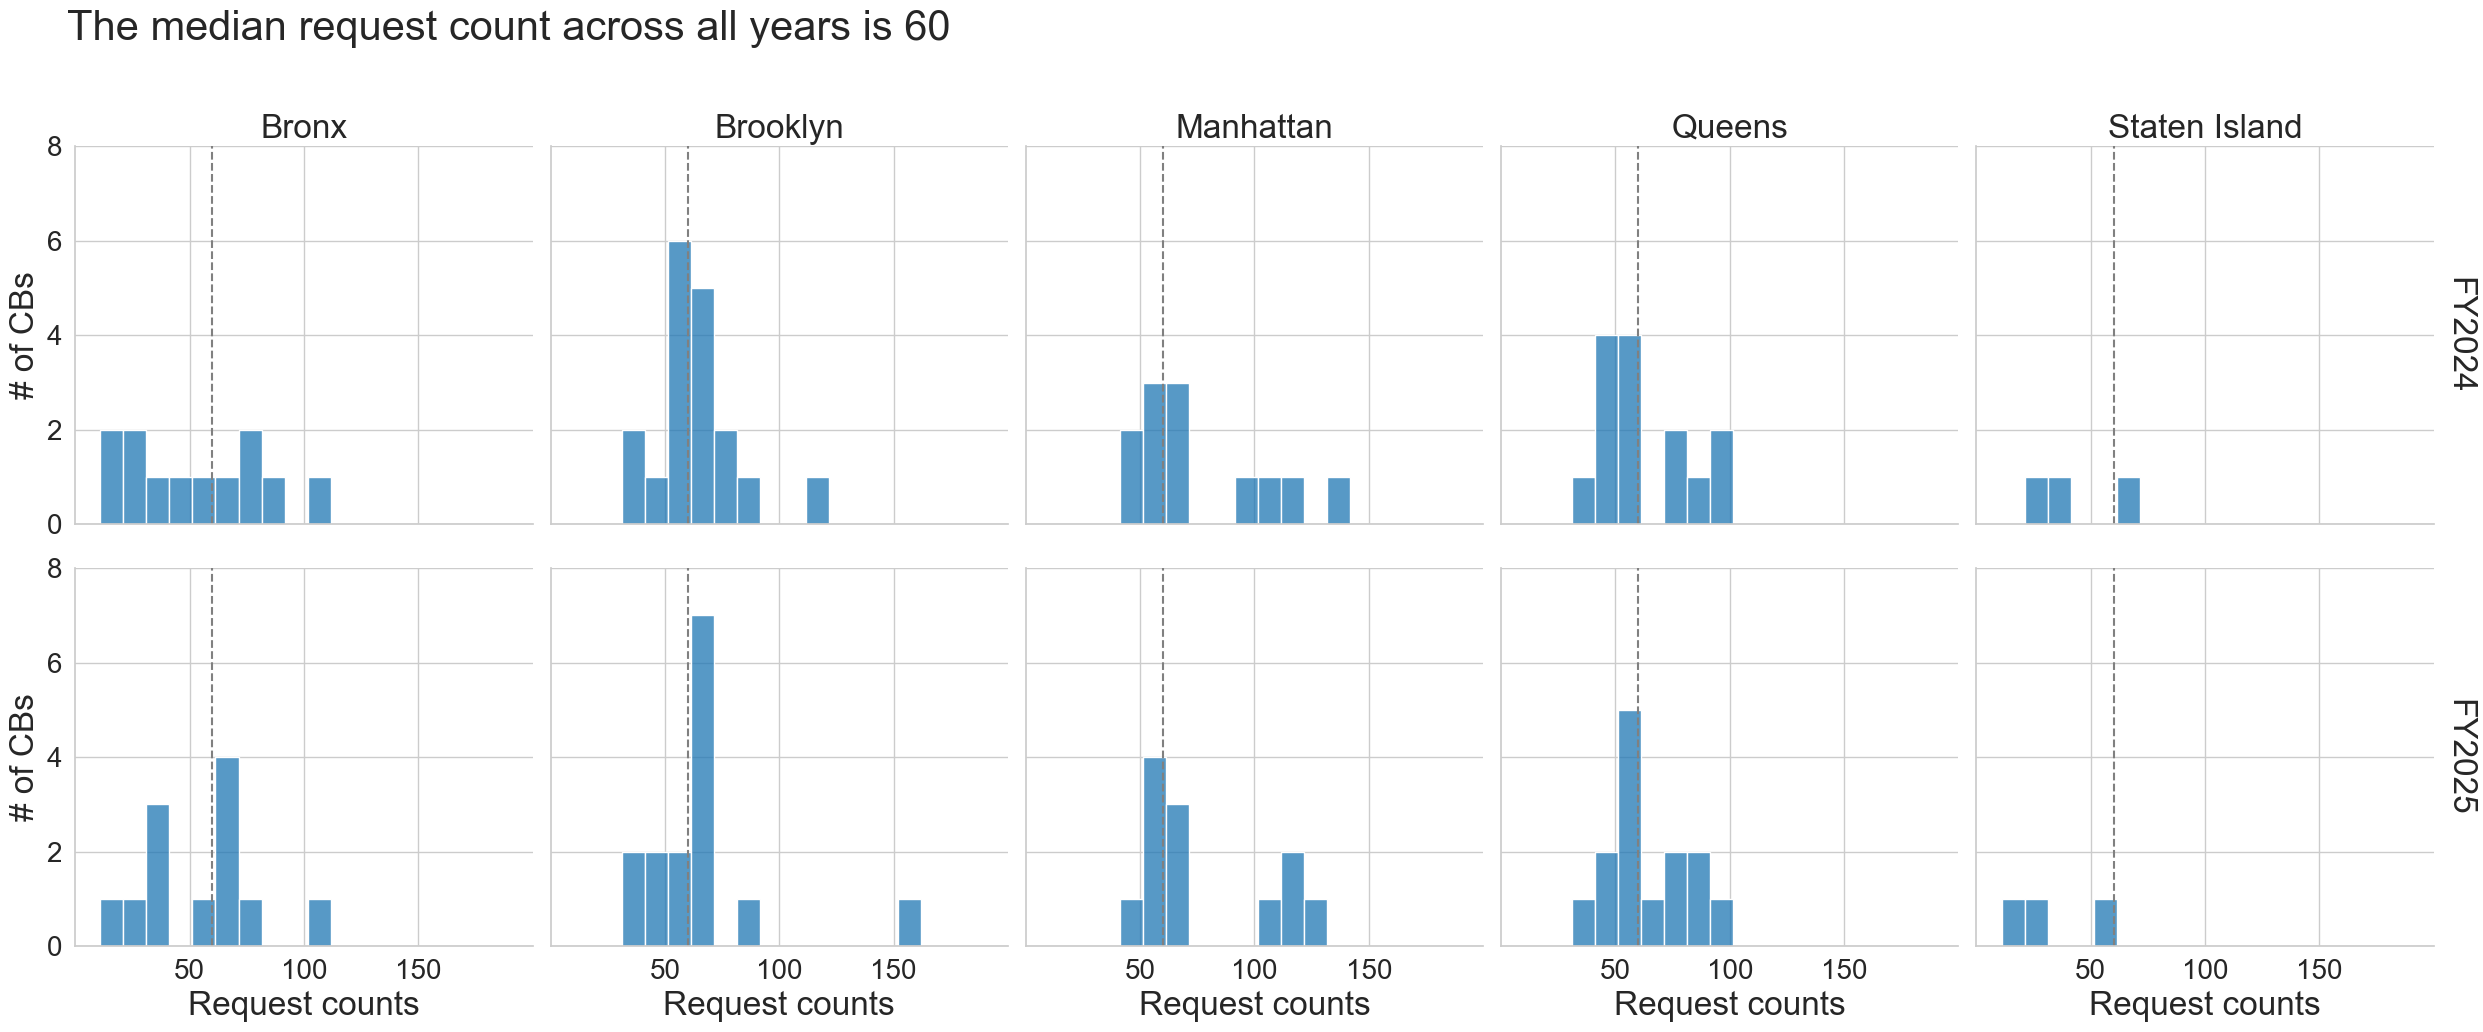

In [60]:
histogram_boroughs = sns.displot(
    request_counts_by_year,
    x="request_count",
    col="borough_clean",
    row="version",
    binwidth=10,
    facet_kws=dict(margin_titles=True),
)
histogram_boroughs.refline(x=avg_request_count)
histogram_boroughs.set_titles(
    col_template="{col_name}", row_template="{row_name}", size=24
)
histogram_boroughs.set_axis_labels(x_var="Request counts", y_var="# of CBs", size=24)
histogram_boroughs.set(
    xlim=(0, 200),
    xticks=range(50, 200, 50),
    ylim=(0, 8),
    yticks=range(0, 9, 2),
)
histogram_boroughs.tick_params("both", labelsize=20)
histogram_boroughs.figure.suptitle(
    f"The median request count across all years is {avg_request_count}",
    x=0.03,
    y=1.03,
    horizontalalignment="left",
    size=30,
)
histogram_boroughs.tight_layout()

In [61]:
# ecdf_boroughs = sns.displot(
#     request_counts_by_year,
#     x="request_count",
#     col="borough_clean",
#     hue="version",
#     kind="ecdf",
#     facet_kws=dict(margin_titles=True),
#     stat="count",
# )

# ecdf_boroughs.tick_params("both", labelsize=20)
# ecdf_boroughs.refline(x=avg_request_count)
# ecdf_boroughs.set_titles(
#     col_template="{col_name}", row_template="{row_name}", size=24
# )
# ecdf_boroughs.set_axis_labels(x_var="Request counts", y_var="# of CBs", size=24)

Text(0.02, 1.3, "Each borough's pattern of request counts is consistent across fiscal years")

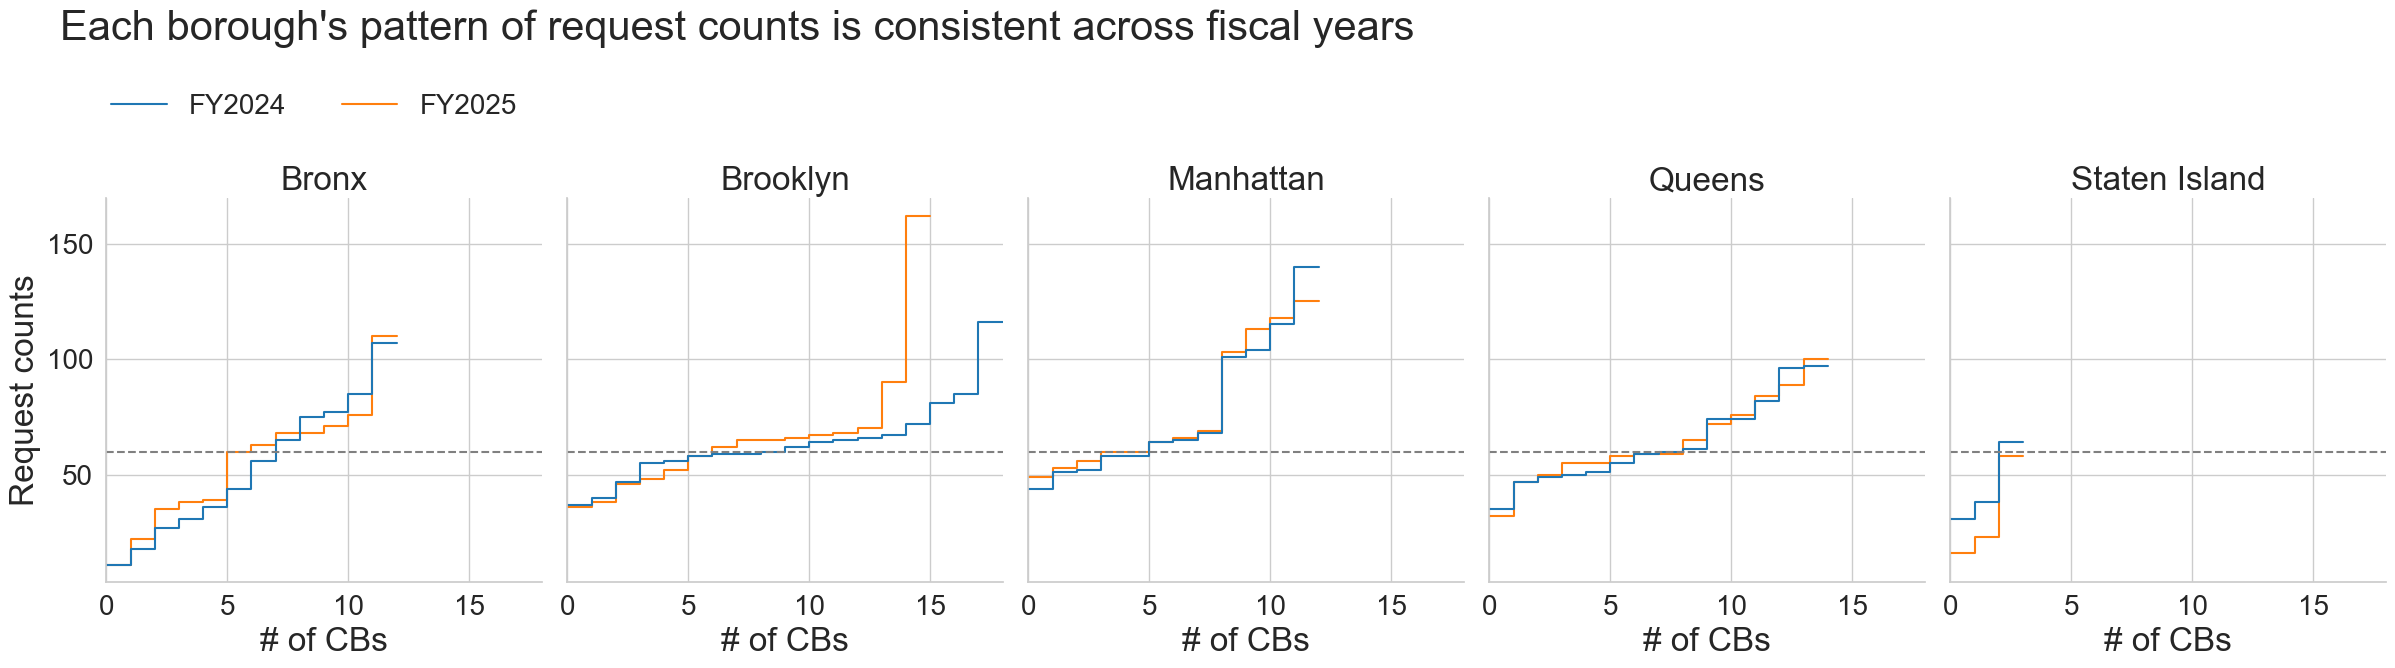

In [62]:
ecdf_boroughs = sns.displot(
    request_counts_by_year,
    y="request_count",
    col="borough_clean",
    hue="version",
    kind="ecdf",
    facet_kws=dict(margin_titles=True),
    stat="count",
)
ecdf_boroughs.tick_params("both", labelsize=20)
ecdf_boroughs.refline(y=avg_request_count, label="median")
ecdf_boroughs.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)
ecdf_boroughs.set_axis_labels(x_var="# of CBs", y_var="Request counts", size=24)
sns.move_legend(
    ecdf_boroughs,
    "lower left",
    bbox_to_anchor=(0.03, 1.03),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=20,
)

ecdf_boroughs.figure.suptitle(
    f"Each borough's pattern of request counts is consistent across fiscal years",
    x=0.02,
    y=1.3,
    horizontalalignment="left",
    size=30,
)

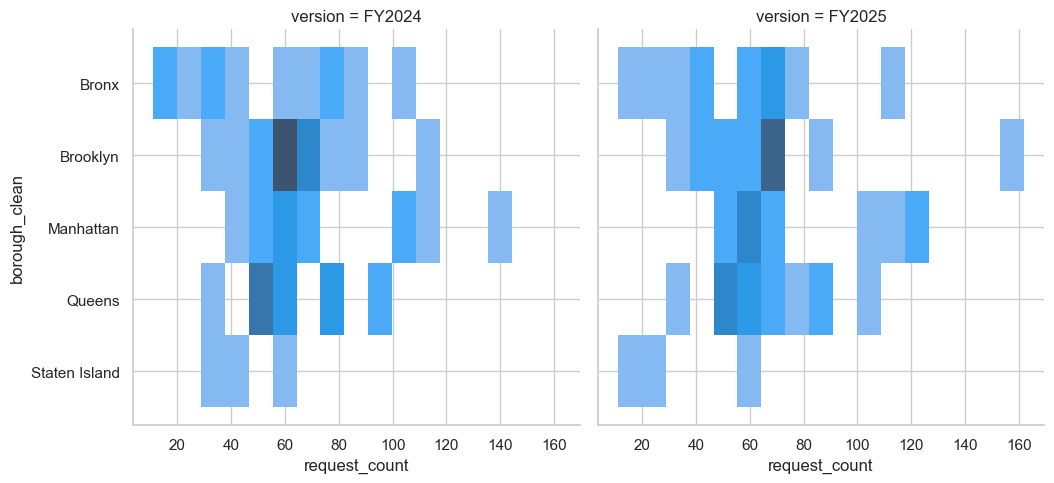

In [63]:
sns.displot(
    data=request_counts_by_year,
    x="request_count",
    y="borough_clean",
    col="version",
    # log_scale=(True, False),
    col_wrap=4,
    # height=4,
    # aspect=0.7,
)

### Repeat requests

In [64]:
request_counts_sorted = request_counts.sort_values(["percent_repeat_requests_FY2025", "requests_FY2025"], ascending=False)
request_counts_sorted.head()

,borough_clean,cb_label_clean,requests_total,requests_FY2024,requests_FY2025,repeat_requests_FY2025,percent_repeat_requests_FY2025
0,Bronx,BX01,71,36,35,35,100.0
3,Bronx,BX04,153,77,76,74,97.0
4,Bronx,BX05,146,75,71,67,94.0
58,Staten Island,SI03,54,38,16,15,94.0
18,Brooklyn,BK07,134,67,67,62,93.0


In [65]:
def repeat_request_counts_barplot(data: pd.DataFrame, title: str):
    fig, ax = plt.subplots(figsize=(6, 15))
    # Plot the total
    sns.set_color_codes("pastel")
    sns.barplot(
        x="requests_FY2025",
        y="cb_label_clean",
        data=data,
        label="Total",
        color="b",
        errorbar=None,
    )

    # Plot the subset
    sns.set_color_codes("muted")
    sns.barplot(
        x="repeat_requests_FY2025",
        y="cb_label_clean",
        data=data,
        label="Repeats",
        color="b",
        errorbar=None,
    )

    for cd_i in range(len(data["cb_label_clean"])):
        percent_repeats = data.iloc[cd_i]["percent_repeat_requests_FY2025"]
        label = "N/A" if pd.isna(percent_repeats) else f"{percent_repeats:.0f}%"
        ax.annotate(
            label,
            (data.iloc[cd_i]["requests_FY2025"] + 2, cd_i),
            ha="left",
            va="center",
            color="b",
            fontsize=8,
        )
        # ax.annotate(label, (2, cd_i), ha="left", va="center", color="b", fontsize=10
        #   path_effects=[patheffects.withStroke(linewidth=1, foreground="0.9")])

    sns.move_legend(
        ax,
        "center",
        bbox_to_anchor=(0.5, 1.05),
        ncol=2,
    )
    ax.set(xlim=(0, 170), ylabel="", xlabel="")
    ax.xaxis.set_ticks_position("top")
    sns.despine(left=True, bottom=True)
    ax.figure.suptitle(
        title,
        x=0.02,
        y=0.95,
        horizontalalignment="left",
        size=18,
    )

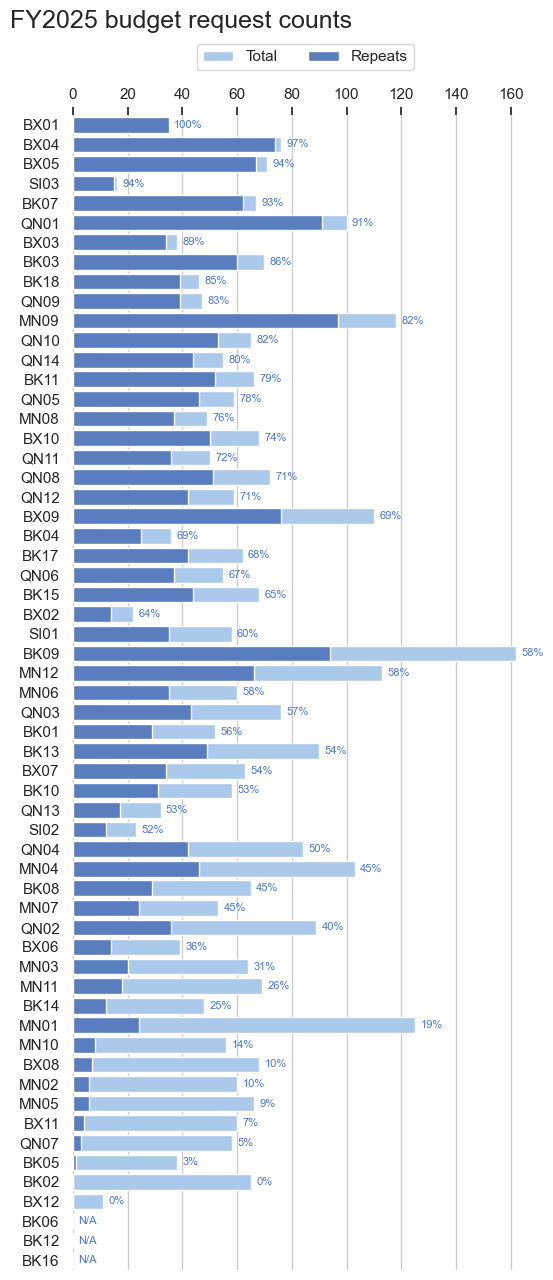

In [66]:
repeat_request_counts_barplot(request_counts_sorted, "FY2025 budget request counts")

## Investigate request similarity

In [67]:
def calculate_id_similarities(data: pd.DataFrame) -> pd.DataFrame:
    # id_lists = [data[request_id_column], data[request_id_column]]
    # mock_id_permutations =  pd.DataFrame(list(itertools.product(*id_lists)), columns=["id_a", "id_b"])
    similarities = pd.DataFrame()
    for _, request_a in data.iterrows():
        for _, request_b in data.iterrows():
            id_a, id_b = request_a[request_id_column], request_b[request_id_column]
            id_a_index, id_b_index = (
                request_a["version"] + id_a,
                request_b["version"] + id_b,
            )
            # if (request_a["request"] != request_b["request"]) or (
            #     request_a["location"] != request_b["location"]
            # ):
            #     similarity = 0
            # elif request_a["explanation_clean"] == request_b["explanation_clean"]:
            #     similarity = 1
            # else:
            similarity = SequenceMatcher(
                isjunk=None,
                a=id_a,
                b=id_b,
            ).ratio()
            id_results = pd.DataFrame(
                [[id_a_index, id_b_index, similarity]],
                columns=["id_a", "id_b", "similarity"],
            )
            similarities = pd.concat([similarities, id_results], ignore_index=True)
    return similarities.sort_values(by=["id_a", "id_b"], ignore_index=True)

In [68]:
def _calculate_request_similarity(
    request_a: pd.Series, request_b: pd.Series, harsh: bool
) -> float:
    weights = {
        "request": 0.2,
        "explanation": 0.6,
        "location": 0.2,
    }
    dissimilar_request_or_location = (request_a["request"] != request_b["request"]) or (
        request_a["location"] != request_b["location"]
    )
    if harsh and dissimilar_request_or_location:
        return 0
    request_similarity = SequenceMatcher(
        isjunk=None, a=request_a["request"], b=request_b["request"]
    )
    explanation_sm = SequenceMatcher(
        isjunk=None,
        a=request_a["explanation_clean"],
        b=request_b["explanation_clean"],
    )
    location_sm = SequenceMatcher(
        isjunk=None, a=request_a["location"], b=request_b["location"]
    )
    # similarity_score = (
    #     request_similarity.ratio() + explanation_sm.ratio() + location_sm.ratio()
    # ) / 3
    similarity_score = (
        (request_similarity.ratio() * weights["request"])
        + (explanation_sm.ratio() * weights["explanation"])
        + (location_sm.ratio() * weights["location"])
    )
    return similarity_score


def calculate_id_similarities_by_version(
    data: pd.DataFrame, versions: list[str], harsh: bool = False
) -> pd.DataFrame:
    if len(versions) != 2:
        raise ValueError(f"number of versions must be 2, not length of {versions}")
    data = data.replace(np.nan, "")
    data_a = data[data["version"] == versions[0]]
    data_b = data[data["version"] == versions[1]]
    print(
        f"Comparing {len(data_a)} {versions[0]} requests to {len(data_b)} {versions[1]} requests"
    )
    if len(data_a) == 0 or len(data_b) == 0:
        raise ArithmeticError(
            f"One of the versions {versions} has no requests, cannot compute similarities"
        )
    similarities = pd.DataFrame()
    for _, request_a in data_a.iterrows():
        for _, request_b in data_b.iterrows():
            id_a, id_b = request_a[request_id_column], request_b[request_id_column]
            id_a_index, id_b_index = (
                request_a["version"] + id_a,
                request_b["version"] + id_b,
            )
            similarity_results = [
                id_a_index,
                id_b_index,
                _calculate_request_similarity(request_a, request_b, harsh),
            ]
            id_results = pd.DataFrame(
                [similarity_results], columns=["id_a", "id_b", "similarity"]
            )
            similarities = pd.concat([similarities, id_results], ignore_index=True)
    return similarities.sort_values(by=["id_a", "id_b"], ignore_index=True)

In [69]:
def shorten_labels(labels: list[mpltext.Text]) -> list:
    return [x.get_text()[0:20] + "..." for x in labels]

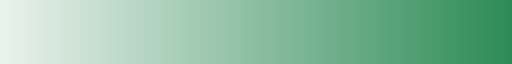

In [70]:
# cmap = mpl.cm.viridis
cmap_test = sns.light_palette("seagreen", as_cmap=True)
cmap_test.set_extremes(over="#AC2F6E", under="1")
# cmap_test = mpl.colors.ListedColormap(["r",  "g", "b", "c"]).with_extremes(
#     over="0.35", under="0.75"
# )

# bounds = [0, 0.2, 0.4, 0.6, 0.8, 1]
bounds = [0, 0.5, 1]
norm = BoundaryNorm(bounds, cmap_test.N, extend='both')
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# cmap_scaled = mpl.cm.ScalarMappable(cmap=cmap_test, norm=norm).cmap
cmap_scaled = ScalarMappable(cmap=cmap_test, norm=norm)
cmap_scaled.cmap

# fig, ax = plt.subplots(figsize=(6, 1))
# fig.subplots_adjust(bottom=0.5)
# fig.colorbar(cmap_scaled,
#              cax=ax, orientation='horizontal',
#              label="Discrete intervals with extend='both' keyword")

In [71]:
def similarity_heatmap(
    data: pd.DataFrame, title: str, y_label: str, x_label: str, triangle: bool = False
):
    data_pivot = data.pivot(index="id_a", columns="id_b", values="similarity")
    if triangle and (len(data_pivot.index) != len(data_pivot.columns)):
        raise ValueError("Cannot make a triangle heatmap with axes of different length")
    data_pivot.index.set_names(y_label, inplace=True)
    data_pivot.columns.set_names(x_label, inplace=True)

    plt.figure(figsize=(10, 8))

    cmap = sns.light_palette("seagreen", as_cmap=True)
    cmap.set_extremes(over="#AC2F6E", under="1")
    cmap_bounds = [0, 0.2, 0.4, 0.6, 0.8, 1]
    cmap_norm = BoundaryNorm(cmap_bounds, cmap.N, extend="max")
    cmap_scaled = ScalarMappable(cmap=cmap, norm=cmap_norm)

    square = True
    mask = np.triu(np.ones_like(data_pivot, dtype=bool)) if triangle else None
    heatmap = sns.heatmap(
        data_pivot,
        linewidth=0.5,
        cmap=cmap_scaled.cmap,
        norm=cmap_norm,
        cbar=False,
        mask=mask,
        square=square,
    )
    heatmap.set(xticklabels=shorten_labels(heatmap.get_xticklabels()))
    heatmap.set(yticklabels=shorten_labels(heatmap.get_yticklabels()))
    heatmap.set_title(title)
    heatmap.get_figure().colorbar(
        cmap_scaled,
        ax=heatmap,
        orientation="vertical",
        shrink=0.4,
    )
    plt.show()

### Mock requests

In [72]:
df_mock = df_all[(df_all["cb_label_clean"] == "BX11")]
df_mock.shape

(87, 28)

#### Calculate simple similarity scores

In [73]:
mock_similarities_2024 = calculate_id_similarities_by_version(df_mock, ["FY2024", "FY2024"])
mock_similarities_2024

Comparing 27 FY2024 requests to 27 FY2024 requests


,id_a,id_b,similarity
0,"FY2024BX11|Assign more non-teaching staff, e.g...","FY2024BX11|Assign more non-teaching staff, e.g...",1.000000
1,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Enhance home care services|Increase...,0.231211
2,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Hire additional crossing guards|Inc...,0.846018
3,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Hire additional traffic enforcement...,0.268002
4,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Improve accessibility of transit in...,0.182731
...,...,...,...
724,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Reconstruct or upgrade a park or am...,0.222217
725,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Reconstruct or upgrade a park or am...,0.281066
726,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Reconstruct or upgrade a park or am...,0.117291
727,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Renovate or upgrade a middle or int...,0.251760


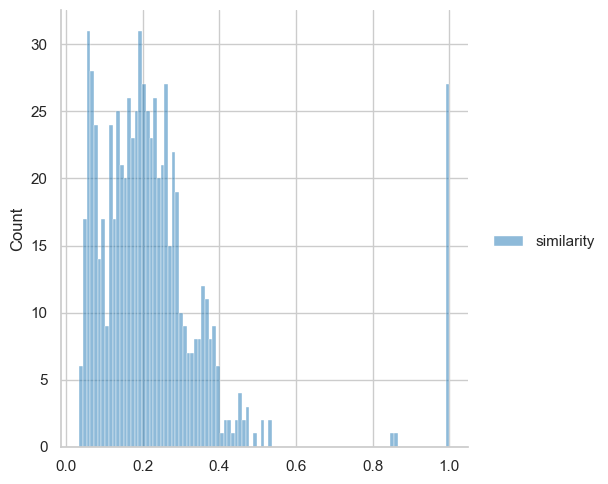

In [74]:
sns.displot(mock_similarities_2024, bins=100)

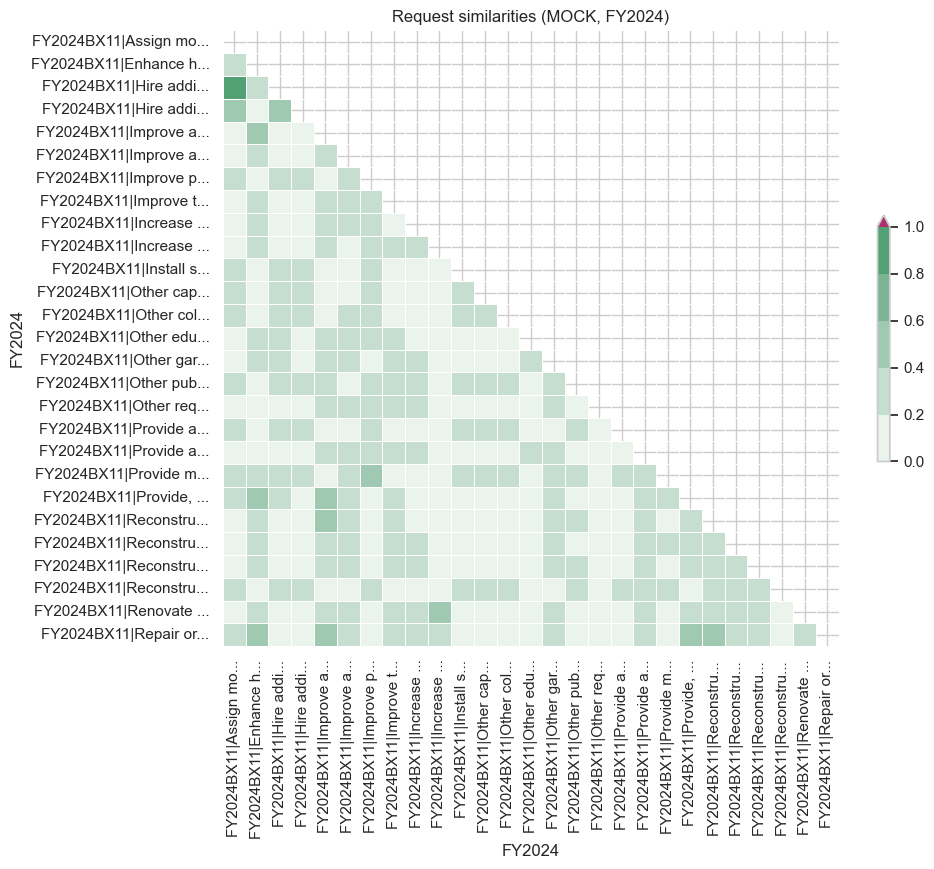

In [75]:
similarity_heatmap(mock_similarities_2024, y_label="FY2024", x_label="FY2024", title="Request similarities (MOCK, FY2024)", triangle=True)

In [76]:
mock_similarities_2024_high = mock_similarities_2024[(mock_similarities_2024["similarity"] >= 0.5) & (mock_similarities_2024["similarity"] != 1)]
mock_similarities_2024_high

,id_a,id_b,similarity
2,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Hire additional crossing guards|Inc...,0.846018
53,FY2024BX11|Enhance home care services|Increase...,FY2024BX11|Repair or upgrade subway stations o...,0.516234
54,FY2024BX11|Hire additional crossing guards|Inc...,"FY2024BX11|Assign more non-teaching staff, e.g...",0.856637
128,FY2024BX11|Improve accessibility of transit in...,"FY2024BX11|Provide, expand, or enhance rental ...",0.530079
544,"FY2024BX11|Provide, expand, or enhance rental ...",FY2024BX11|Improve accessibility of transit in...,0.533483
703,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Enhance home care services|Increase...,0.516833


In [77]:
print(mock_similarities_2024_high.iloc[0]["id_a"])
print(mock_similarities_2024_high.iloc[0]["id_b"])

FY2024BX11|Assign more non-teaching staff, e.g., to provide social, health and other services|IncreasefundingforSchoolCrossingGuardsthroughoutCB11,especiallyneededatVanNestAcademyPS/MS498(locatedat1640BronxdaleAve,Bronx,NY10462?intersectionofVanNestAvenue&BronxdaleAvenue)
FY2024BX11|Hire additional crossing guards|IncreasefundingforSchoolCrossingGuardsthroughoutCB11,especiallyneededatVanNestAcademyPS/MS498(locatedat1640BronxdaleAve,Bronx,NY10462?intersectionofVanNestAvenue&BronxdaleAvenue)


In [78]:
mock_similarities_2025 = calculate_id_similarities_by_version(df_mock, ["FY2025", "FY2025"])
mock_similarities_2025

Comparing 60 FY2025 requests to 60 FY2025 requests


,id_a,id_b,similarity
0,"FY2025BX11|Assign more non-teaching staff, e.g...","FY2025BX11|Assign more non-teaching staff, e.g...",1.000000
1,"FY2025BX11|Assign more non-teaching staff, e.g...",FY2025BX11|Conduct traffic or parking studies|...,0.096291
2,"FY2025BX11|Assign more non-teaching staff, e.g...",FY2025BX11|Conduct traffic or parking studies|...,0.153140
3,"FY2025BX11|Assign more non-teaching staff, e.g...","FY2025BX11|Create a new, or renovate or upgrad...",0.129412
4,"FY2025BX11|Assign more non-teaching staff, e.g...","FY2025BX11|Create a new, or renovate or upgrad...",0.188090
...,...,...,...
3595,FY2025BX11|Upgrade or create new plazas|ThePed...,FY2025BX11|Renovate or upgrade a middle or int...,0.205547
3596,FY2025BX11|Upgrade or create new plazas|ThePed...,FY2025BX11|Renovate or upgrade public housing ...,0.166735
3597,FY2025BX11|Upgrade or create new plazas|ThePed...,FY2025BX11|Repair or provide new street lights...,0.162684
3598,FY2025BX11|Upgrade or create new plazas|ThePed...,FY2025BX11|Roadway maintenance (i.e. pothole r...,0.089225


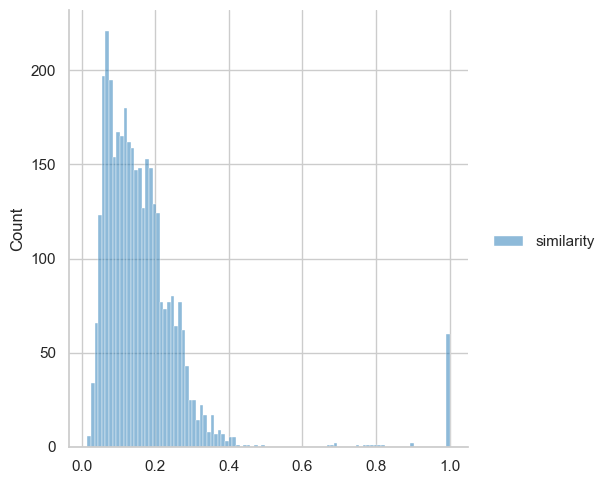

In [79]:
sns.displot(mock_similarities_2025, bins=100)

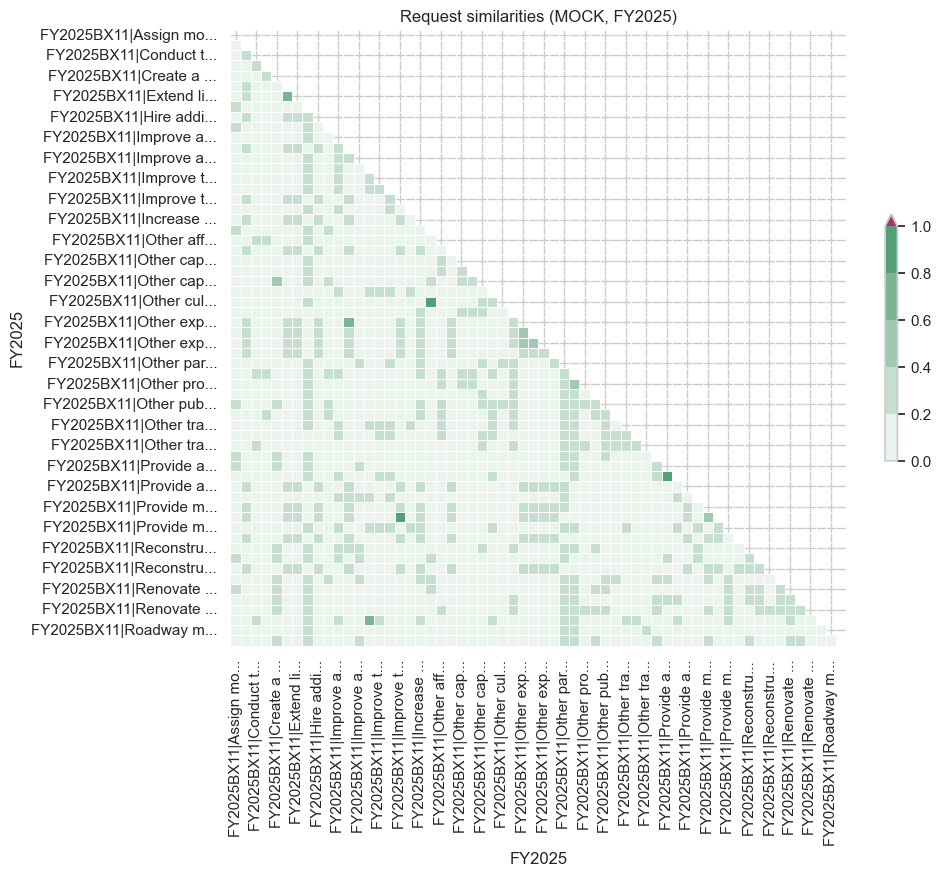

In [80]:
similarity_heatmap(mock_similarities_2025, y_label="FY2025", x_label="FY2025", title="Request similarities (MOCK, FY2025)", triangle=True)

#### Calculate "harsh" similarity scores

In [81]:
mock_similarities_2024_harsh = calculate_id_similarities_by_version(df_mock, ["FY2024", "FY2024"], harsh=True)
mock_similarities_2024_harsh

Comparing 27 FY2024 requests to 27 FY2024 requests


,id_a,id_b,similarity
0,"FY2024BX11|Assign more non-teaching staff, e.g...","FY2024BX11|Assign more non-teaching staff, e.g...",1.0
1,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Enhance home care services|Increase...,0.0
2,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Hire additional crossing guards|Inc...,0.0
3,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Hire additional traffic enforcement...,0.0
4,"FY2024BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Improve accessibility of transit in...,0.0
...,...,...,...
724,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Reconstruct or upgrade a park or am...,0.0
725,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Reconstruct or upgrade a park or am...,0.0
726,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Reconstruct or upgrade a park or am...,0.0
727,FY2024BX11|Repair or upgrade subway stations o...,FY2024BX11|Renovate or upgrade a middle or int...,0.0


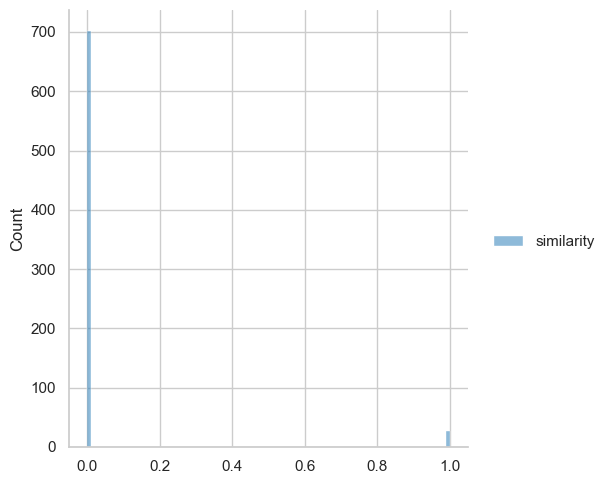

In [82]:
sns.displot(mock_similarities_2024_harsh, bins=100)

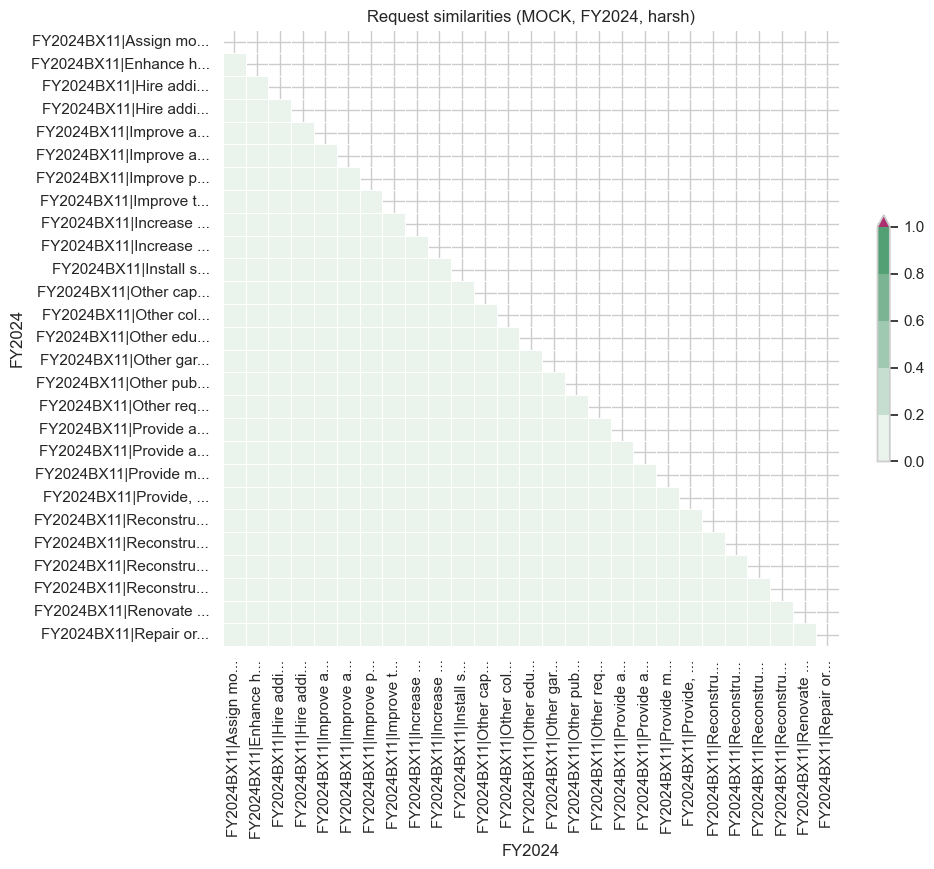

In [83]:
similarity_heatmap(mock_similarities_2024_harsh, y_label="FY2024", x_label="FY2024", title="Request similarities (MOCK, FY2024, harsh)", triangle=True)

In [84]:
mock_similarities_2025_harsh = calculate_id_similarities_by_version(df_mock, ["FY2025", "FY2025"], harsh=True)

Comparing 60 FY2025 requests to 60 FY2025 requests


In [85]:
mock_similarities_2025_harsh.value_counts("similarity")

similarity
0.000000    3538
1.000000      60
0.690559       1
0.745105       1
Name: count, dtype: int64

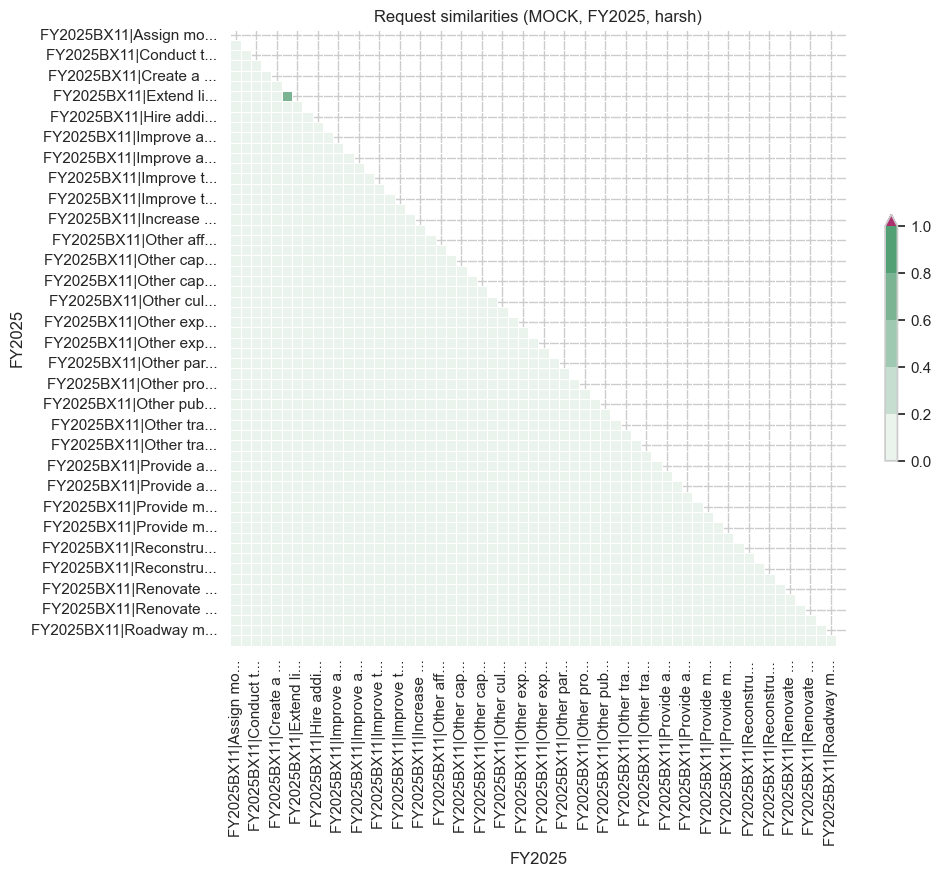

In [86]:
similarity_heatmap(mock_similarities_2025_harsh, y_label="FY2025", x_label="FY2025", title="Request similarities (MOCK, FY2025, harsh)", triangle=True)

In [87]:
mock_similarities_2025_harsh[(mock_similarities_2025_harsh["similarity"] >= 0.5) & (mock_similarities_2025_harsh["similarity"] != 1)].iloc[0]["id_a"]

'FY2025BX11|Extend library hours, expand library programs, and enhance library collections (NYPL)|Inthepastfiscalyear,NYPLprioritizedyouthandeducation,opening15teencentersintheBronx,Manhattan,andStatenIslandTheafter-schoolprogramwillexpandto18newlocations,totaling50acrossthethreeboroughsNYPLisalsoexploringinitiativesforadults,seniors,andasylumseekersnearourbranchesToservepatronseffectively,NYPLaimstoexpandcollections,enhanceskills-basedprograms,andcreateaccessiblecommunityspacesWeurgeOMBtosupportincreasedfundingforlibrariesintheupcomingfiscalyearCanOMBprovidethenecessarysupport?'

In [88]:
mock_similarities_2025_harsh[(mock_similarities_2025_harsh["similarity"] >= 0.5) & (mock_similarities_2025_harsh["similarity"] != 1)].iloc[0]["id_b"]

'FY2025BX11|Extend library hours, expand library programs, and enhance library collections (NYPL)|Inthepastfiscalyear,theNewYorkPublicLibrary(NYPL)prioritizedyouthandeducation,establishing15newteencentersinBronx,Manhattan,andStatenIslandaheadoftheschoolyearAdditionally,theafter-schoolprogramwillextendto18newlocations,totaling50acrossthethreeboroughs(9inManhattan,5intheBronx,and4inStatenIsland)NYPLisalsoexploringinitiativestoaidadults,seniors,andrecentlyarrivedasylumseekersnearourbranchesTobetterservepatrons,NYPLaimstoexpanddigitalandin-personcollections,offerskills-basedandtechnicalprograms,andcreateaccessiblecommunityspacesforlearningandconnectionWerequestincreasedexpensefundingfromtheOMBfortheupcomingfiscalyearCanOMBprovidethenecessarysupport?'

In [89]:
mock_similarities_by_version = calculate_id_similarities_by_version(df_mock, ["FY2025", "FY2024"])
mock_similarities_by_version

Comparing 60 FY2025 requests to 27 FY2024 requests


,id_a,id_b,similarity
0,"FY2025BX11|Assign more non-teaching staff, e.g...","FY2024BX11|Assign more non-teaching staff, e.g...",0.293286
1,"FY2025BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Enhance home care services|Increase...,0.276577
2,"FY2025BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Hire additional crossing guards|Inc...,0.139304
3,"FY2025BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Hire additional traffic enforcement...,0.084039
4,"FY2025BX11|Assign more non-teaching staff, e.g...",FY2024BX11|Improve accessibility of transit in...,0.324543
...,...,...,...
1615,FY2025BX11|Upgrade or create new plazas|ThePed...,FY2024BX11|Reconstruct or upgrade a park or am...,0.200013
1616,FY2025BX11|Upgrade or create new plazas|ThePed...,FY2024BX11|Reconstruct or upgrade a park or am...,0.223415
1617,FY2025BX11|Upgrade or create new plazas|ThePed...,FY2024BX11|Reconstruct or upgrade a park or am...,0.095236
1618,FY2025BX11|Upgrade or create new plazas|ThePed...,FY2024BX11|Renovate or upgrade a middle or int...,0.205547


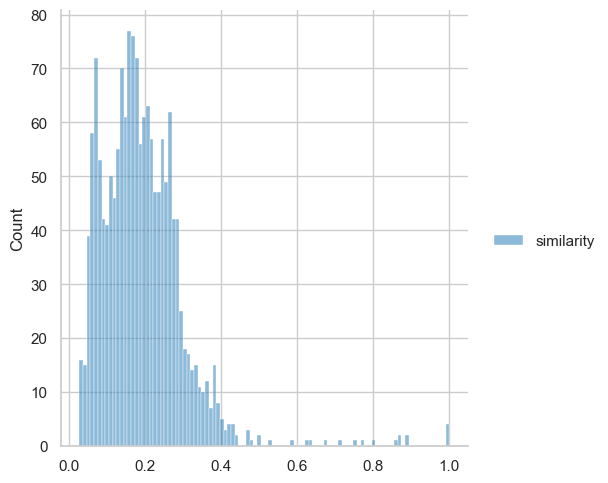

In [90]:
sns.displot(mock_similarities_by_version, bins=100)

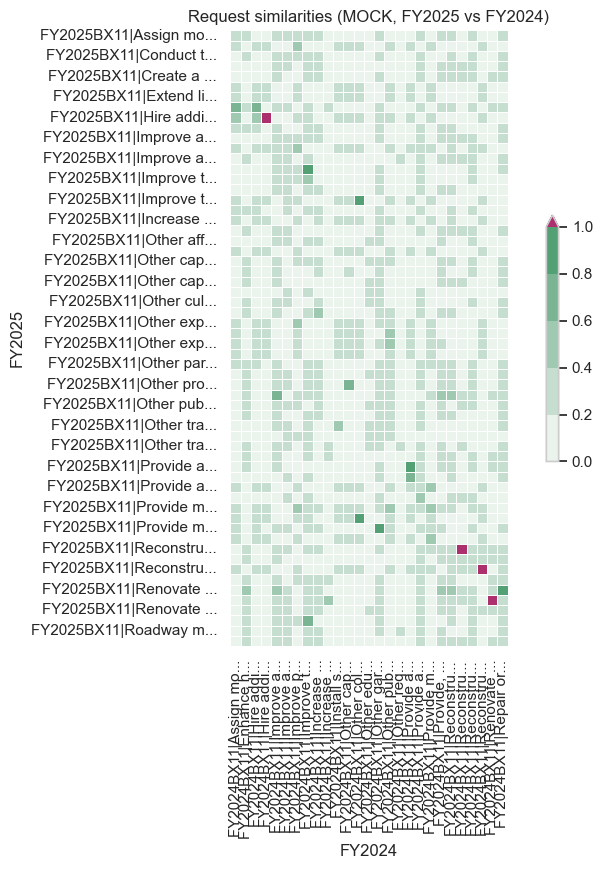

In [91]:
similarity_heatmap(mock_similarities_by_version, y_label="FY2025", x_label="FY2024", title="Request similarities (MOCK, FY2025 vs FY2024)")

In [92]:
mock_similarities_by_version_perfects = mock_similarities_by_version[mock_similarities_by_version["similarity"] == 1]
mock_similarities_by_version_perfects

,id_a,id_b,similarity
219,FY2025BX11|Hire additional traffic enforcement...,FY2024BX11|Hire additional traffic enforcement...,1.0
1372,FY2025BX11|Reconstruct or upgrade a park or am...,FY2024BX11|Reconstruct or upgrade a park or am...,1.0
1428,FY2025BX11|Reconstruct or upgrade a park or am...,FY2024BX11|Reconstruct or upgrade a park or am...,1.0
1510,FY2025BX11|Renovate or upgrade a middle or int...,FY2024BX11|Renovate or upgrade a middle or int...,1.0


In [93]:
mock_repeats = df_mock[df_mock["is_repeat"] & (df_mock["version"] == "FY2025")]

print(
    f"In FY2025 of mock data, there are {len(mock_repeats)} requests marked as repeats and {len(mock_similarities_by_version_perfects)} requests with a perfect similarity score to a FY2024 request"
)

In FY2025 of mock data, there are 4 requests marked as repeats and 4 requests with a perfect similarity score to a FY2024 request


In [94]:
mock_similarities_by_version_harsh = calculate_id_similarities_by_version(df_mock, ["FY2025", "FY2024"], harsh=True)

Comparing 60 FY2025 requests to 27 FY2024 requests


In [95]:
mock_similarities_by_version_harsh.value_counts("similarity")

similarity
0.000000    1615
1.000000       4
0.502578       1
Name: count, dtype: int64

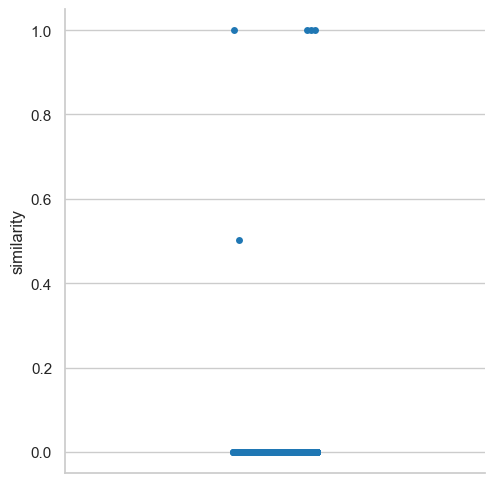

In [96]:
sns.catplot(data=mock_similarities_by_version_harsh, y="similarity")

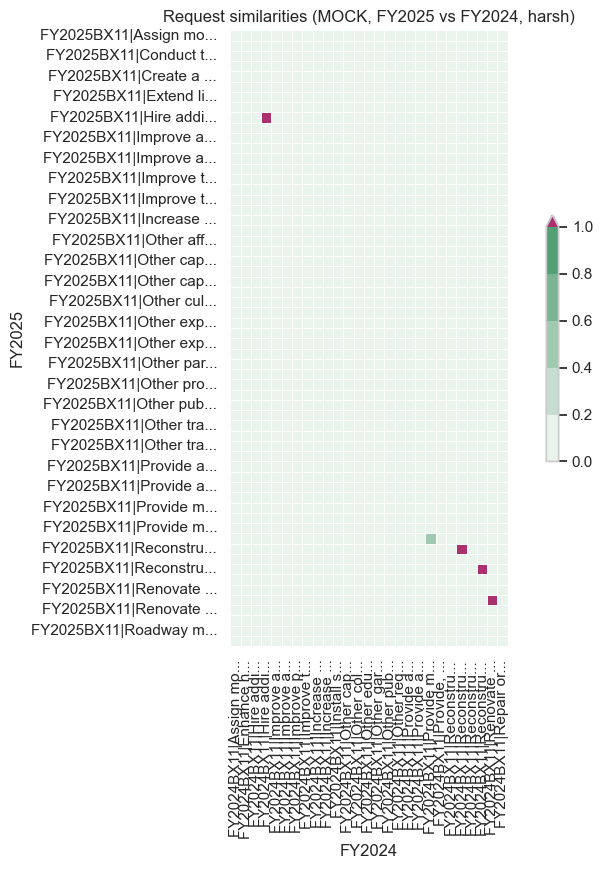

In [97]:
similarity_heatmap(mock_similarities_by_version_harsh, y_label="FY2025", x_label="FY2024", title="Request similarities (MOCK, FY2025 vs FY2024, harsh)")

In [98]:
mock_similarities_by_version_harsh_highs = mock_similarities_by_version_harsh[
    mock_similarities_by_version_harsh["similarity"] >= 0.5
].sort_values("similarity")
mock_similarities_by_version_harsh_highs

,id_a,id_b,similarity
1342,FY2025BX11|Provide more programs in parks or r...,FY2024BX11|Provide more programs in parks or r...,0.502578
219,FY2025BX11|Hire additional traffic enforcement...,FY2024BX11|Hire additional traffic enforcement...,1.000000
1372,FY2025BX11|Reconstruct or upgrade a park or am...,FY2024BX11|Reconstruct or upgrade a park or am...,1.000000
1428,FY2025BX11|Reconstruct or upgrade a park or am...,FY2024BX11|Reconstruct or upgrade a park or am...,1.000000
1510,FY2025BX11|Renovate or upgrade a middle or int...,FY2024BX11|Renovate or upgrade a middle or int...,1.000000


In [99]:
with pd.option_context("display.max_colwidth", 1000):
  display(mock_similarities_by_version_harsh_highs.iloc[0])

id_a          FY2025BX11|Provide more programs in parks or recreational centers|Asstatedinthecommunitysnapshotofkeyindicators,226%ofBronxDistrict11iscomprisedofyouthundertheageof18withfamiliesexperiencinganincomeof20%belowtheNYCgovpovertythresholdascomparedtothefederalpovertyrate,and494%paying35%ofthatincometorentWith19ParksinBxDistrict11,thereisastrongcommunityconsensusforFREEandequitableprogrammingthatwouldaddressthehealthandwellnessofourDistrictYouthandcurrentsocialdriversofhealthProgramsinthearts(music,dance),Sports(basketball,baseball,soccer),andthelikeaidtheDistrictyouthandfallinlinewiththeproposedpreliminary10-yearCityCapitalplanof1593BillionallocatedinparttowardsParksandculturalservices
id_b                                                                                                                                                                                                                                                                                                    

In [100]:
a_explanation = "Asstatedinthecommunitysnapshotofkeyindicators,226%ofBronxDistrict11iscomprisedofyouthundertheageof18withfamiliesexperiencinganincomeof20%belowtheNYCgovpovertythresholdascomparedtothefederalpovertyrate,and494%paying35%ofthatincometorentWith19ParksinBxDistrict11,thereisastrongcommunityconsensusforFREEandequitableprogrammingthatwouldaddressthehealthandwellnessofourDistrictYouthandcurrentsocialdriversofhealthProgramsinthearts(music,dance),Sports(basketball,baseball,soccer),andthelikeaidtheDistrictyouthandfallinlinewiththeproposedpreliminary10-yearCityCapitalplanof1593BillionallocatedinparttowardsParksandculturalservices"
b_explanation = "ThefencinginBronxParkalongthenorthboundlaneoftheBronxRiverParkwaysouthofFordhamRoad/PelhamParkwayneedstobereplaced"
mock_sm = SequenceMatcher(
    isjunk=None, a=a_explanation, b=b_explanation
)
mock_sm.ratio()

0.17096336499321574

### All requests in a borough

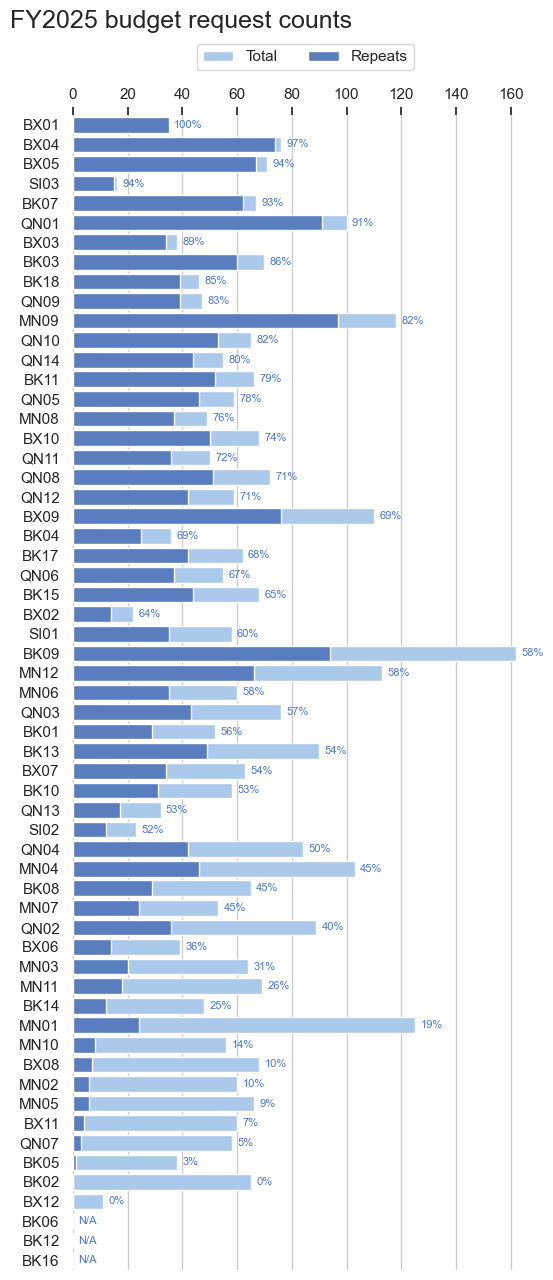

In [101]:
repeat_request_counts_barplot(request_counts_sorted, "FY2025 budget request counts")

In [102]:
def calculate_request_similarities_by_cb(
    data: pd.DataFrame, cb_labels: list[str]
) -> list[pd.DataFrame]:
    cb_request_similarities = []

    for cb in cb_labels:
        print(f"Calculating similarity of CB {cb} ...")
        df_cb = data[data["cb_label_clean"] == cb]
        try:
            request_similarities = calculate_id_similarities_by_version(
                df_cb, versions=["FY2025", "FY2024"], harsh=True
            )
            request_similarities["cb_label"] = cb
            cb_request_similarities.append(request_similarities)
        except ArithmeticError as e:
            print(e)
    return pd.concat(cb_request_similarities)

In [103]:
# HACK one borough for now
cb_labels = sorted(df_all[df_all["borough_clean"] == "Staten Island"]["cb_label_clean"].unique())
cb_labels

['SI01', 'SI02', 'SI03']

In [104]:
request_similarities_by_cb = calculate_request_similarities_by_cb(df_all, cb_labels)
request_similarities_by_cb

Calculating similarity of CB SI01 ...
Comparing 58 FY2025 requests to 64 FY2024 requests
Calculating similarity of CB SI02 ...
Comparing 23 FY2025 requests to 31 FY2024 requests
Calculating similarity of CB SI03 ...
Comparing 16 FY2025 requests to 38 FY2024 requests


,id_a,id_b,similarity,cb_label
0,FY2025SI01|Address illegal conversions and use...,FY2024SI01|Address illegal conversions and use...,1.0,SI01
1,FY2025SI01|Address illegal conversions and use...,"FY2024SI01|Create a new, or renovate or upgrad...",0.0,SI01
2,FY2025SI01|Address illegal conversions and use...,"FY2024SI01|Create a new, or renovate or upgrad...",0.0,SI01
3,FY2025SI01|Address illegal conversions and use...,FY2024SI01|Create or promote programs to de-st...,0.0,SI01
4,FY2025SI01|Address illegal conversions and use...,FY2024SI01|Develop a capital project for speci...,0.0,SI01
...,...,...,...,...
603,FY2025SI03|Reconstruct streets|Allocatefundsfo...,FY2024SI03|Reconstruct streets|HWR1140CRequest...,0.0,SI03
604,FY2025SI03|Reconstruct streets|Allocatefundsfo...,FY2024SI03|Repair or construct new curbs or pe...,0.0,SI03
605,FY2025SI03|Reconstruct streets|Allocatefundsfo...,FY2024SI03|Repair or construct new curbs or pe...,0.0,SI03
606,FY2025SI03|Reconstruct streets|Allocatefundsfo...,FY2024SI03|Repair or construct new curbs or pe...,0.0,SI03


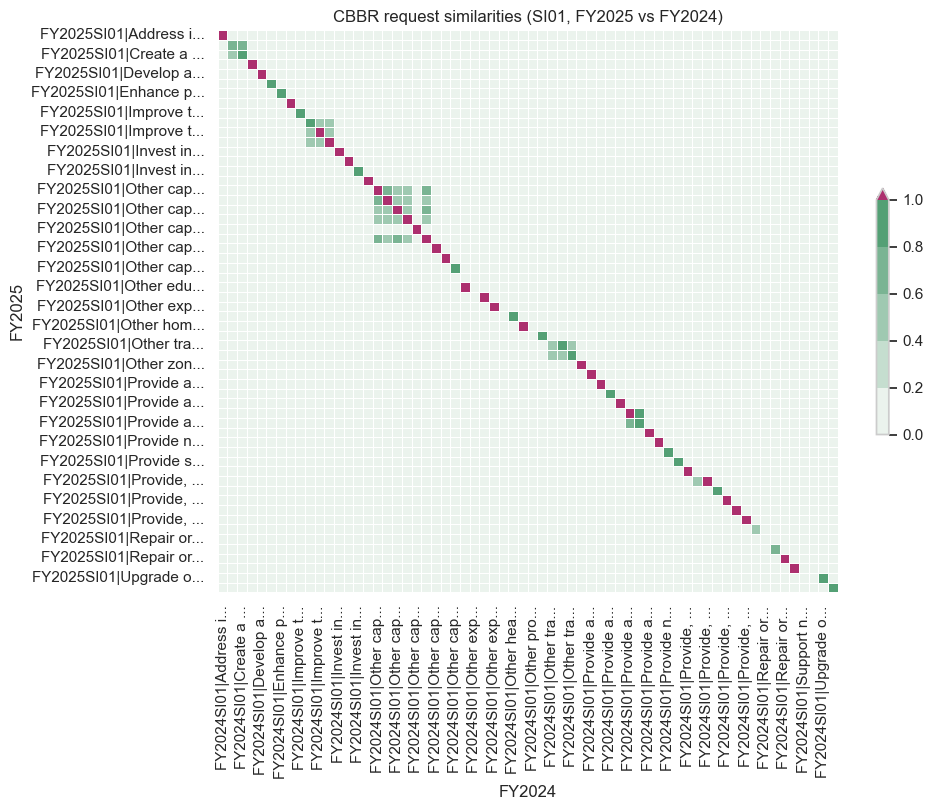

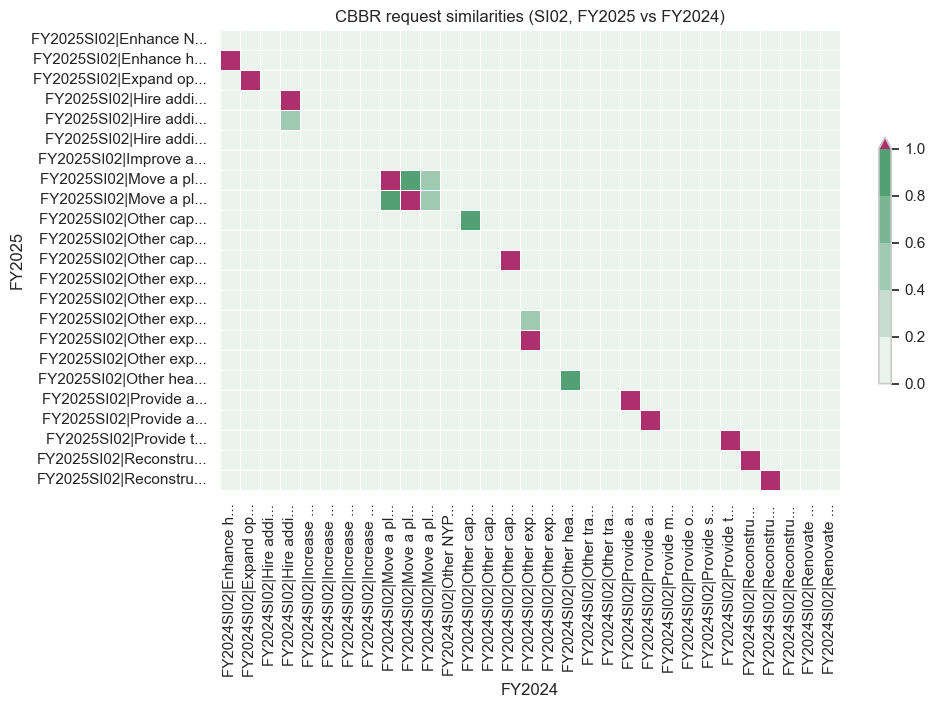

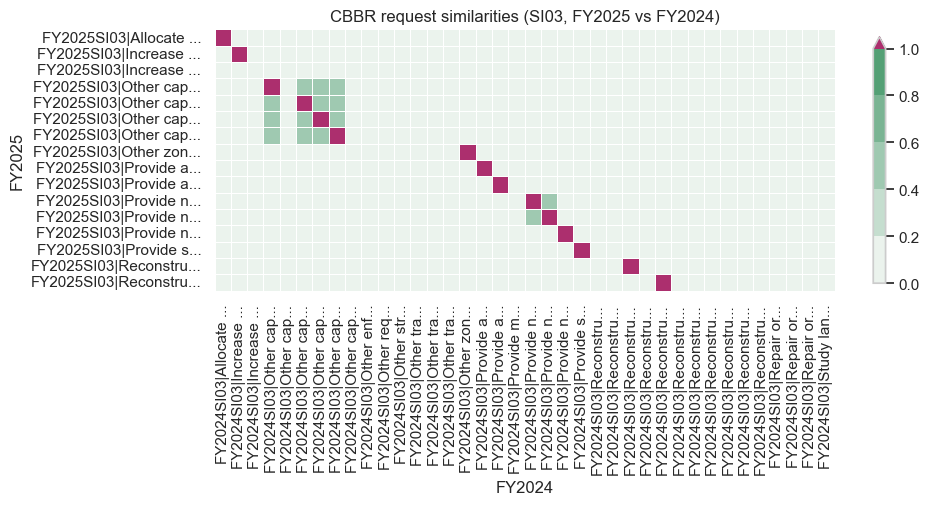

In [105]:
for cb in sorted(request_similarities_by_cb["cb_label"].unique()):
    data = request_similarities_by_cb[request_similarities_by_cb["cb_label"] == cb]
    similarity_heatmap(
        data=data,
        title=f"CBBR request similarities ({cb}, FY2025 vs FY2024)",
        y_label="FY2025",
        x_label="FY2024",
    )

In [106]:
request_similarities_by_cb_interesting = request_similarities_by_cb[
    (request_similarities_by_cb["similarity"] >= 0.5)
    & (request_similarities_by_cb["similarity"] != 1)
].sort_values("similarity", ascending=False)
request_similarities_by_cb_interesting

,id_a,id_b,similarity,cb_label
2798,FY2025SI01|Provide new facilities such as a fi...,FY2024SI01|Provide new facilities such as a fi...,0.998974,SI01
256,FY2025SI02|Move a planned capital project into...,FY2024SI02|Move a planned capital project into...,0.985882,SI02
226,FY2025SI02|Move a planned capital project into...,FY2024SI02|Move a planned capital project into...,0.985882,SI02
291,FY2025SI02|Other capital budget request for DE...,FY2024SI02|Other capital budget request for DE...,0.969884,SI02
3059,"FY2025SI01|Provide, expand, or enhance funding...","FY2024SI01|Provide, expand, or enhance funding...",0.965000,SI01
...,...,...,...,...
121,FY2025SI03|Other capital budget request for DE...,FY2024SI03|Other capital budget request for DE...,0.518996,SI03
159,FY2025SI03|Other capital budget request for DE...,FY2024SI03|Other capital budget request for DE...,0.511418,SI03
227,FY2025SI02|Move a planned capital project into...,FY2024SI02|Move a planned capital project into...,0.507463,SI02
258,FY2025SI02|Move a planned capital project into...,FY2024SI02|Move a planned capital project into...,0.507463,SI02


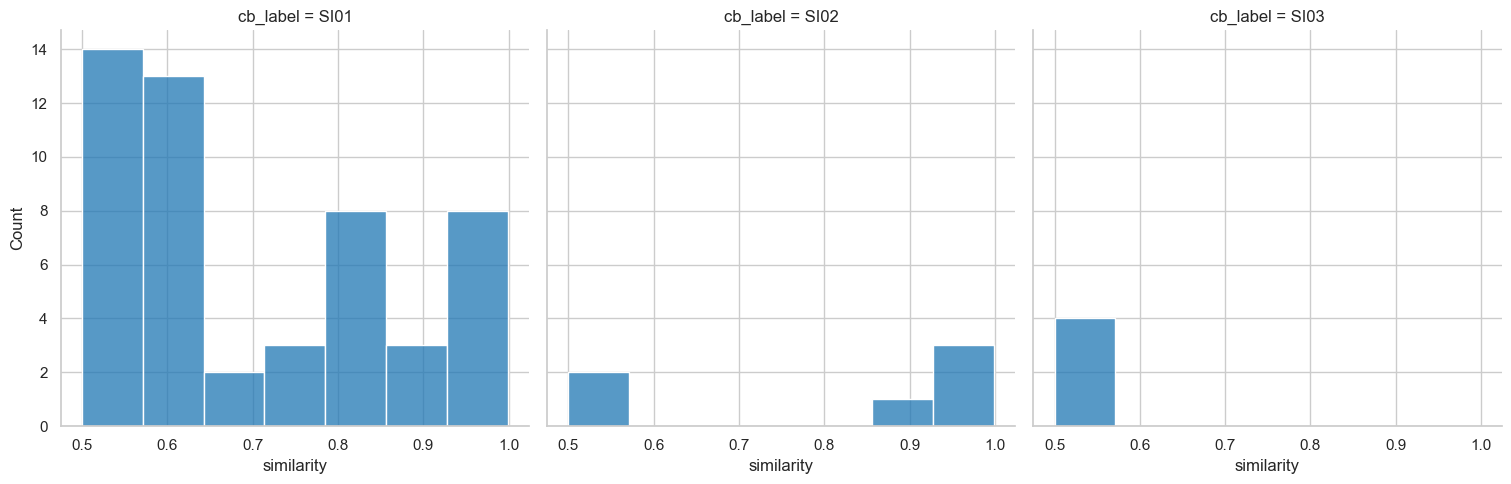

In [107]:
sns.displot(request_similarities_by_cb_interesting, x="similarity", col="cb_label", col_wrap=5)

In [108]:
print(request_similarities_by_cb_interesting.iloc[0]["id_a"])
print(request_similarities_by_cb_interesting.iloc[0]["id_b"])

FY2025SI01|Provide new facilities such as a firehouse or EMS station|ProvidenewfacilitiessuchasafirehouseorEMSstation-ThepopulationisrisingandwillrisefasterwiththeStGeorge,StapletonandBayStreetCorridorAffordableHousingprograms,includingtheexpandedcommercialactivitiesSinceresponsetimeshaverisen,thisnewfacilityamatterwillbecomeoneofextremepublicsafetyimportance
FY2024SI01|Provide new facilities such as a firehouse or EMS station|ProvidenewfacilitiessuchasafirehouseorEMSstation-ThepopulationisrisingandwillrisefasterwiththeStGeorge,StapletonandBayStreetCorridorAffordableHousingprograms,includingtheexpandedcommercialactivitiesSinceresponsetimeshaverisen,thisnewfacilityamatterwillbecomeoneofexrtremepublicsafetyimportance


In [109]:
print(request_similarities_by_cb_interesting.iloc[-1]["id_a"])
print(request_similarities_by_cb_interesting.iloc[-1]["id_b"])

FY2025SI01|Other capital budget request for DEP|BaileyPlaceandNorthfieldAvenuestorms-Toendfloodingandponding
FY2024SI01|Other capital budget request for DEP|ForestAvenuestormsystem,includingBroadwayDelafield,NorthMadaandKisseltoRichmondTerraceandMorrisonandPeltonAvenuesTostoppropertydestructionandfloodingalwaystotheEmergencyRoomandotherpropertyatRUMCandpropertyownersbehindandinallareasmentioned


Comparing 38 FY2024 requests to 38 FY2024 requests


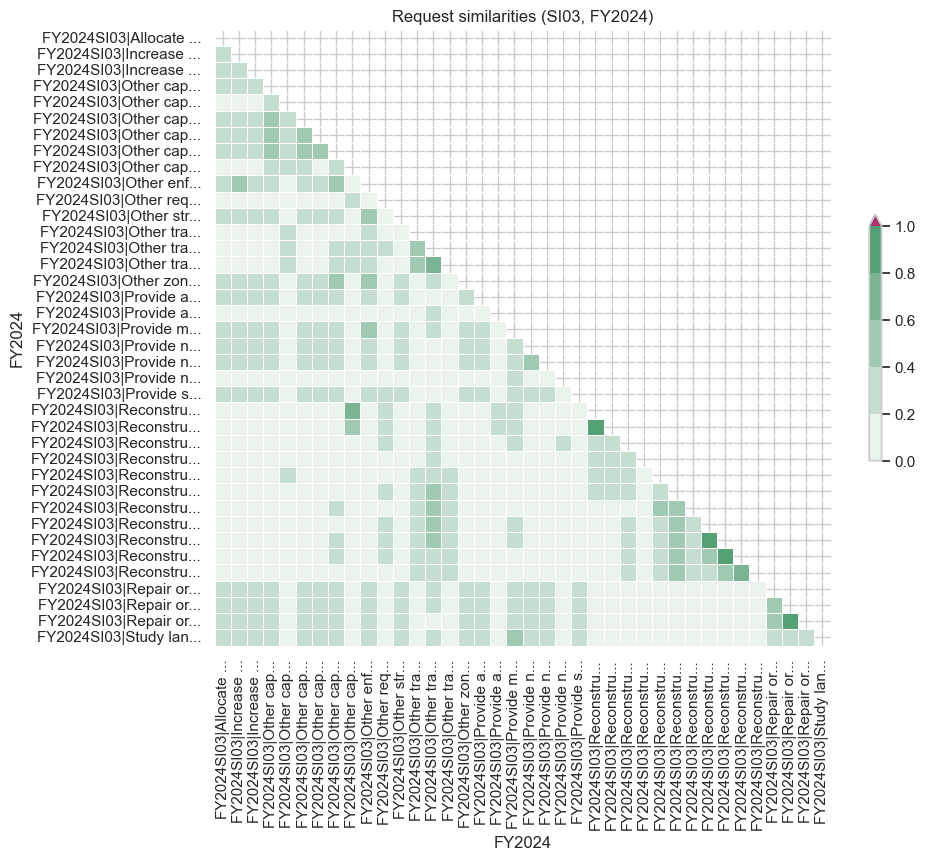

In [112]:
si03_2024_similarities = calculate_id_similarities_by_version(
    df_all[df_all["cb_label_clean"] == "SI03"], ["FY2024", "FY2024"]
)
similarity_heatmap(
    si03_2024_similarities,
    y_label="FY2024",
    x_label="FY2024",
    title="Request similarities (SI03, FY2024)",
    triangle=True,
)

Comparing 16 FY2025 requests to 16 FY2025 requests


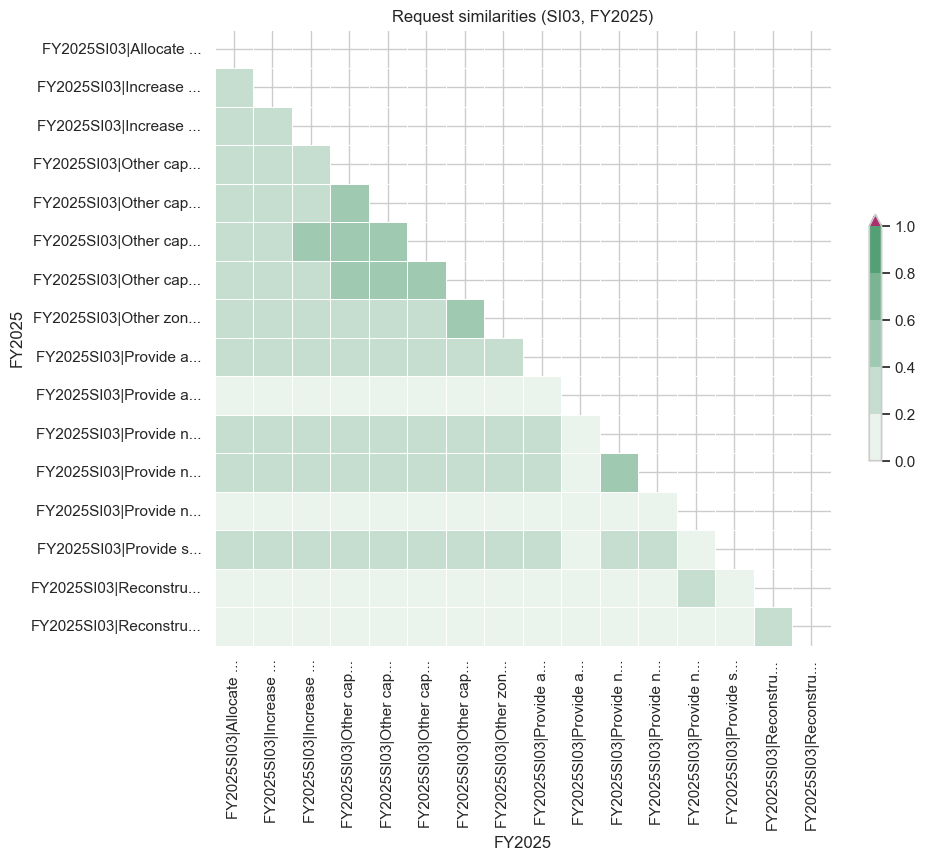

In [113]:
si03_2025_similarities = calculate_id_similarities_by_version(
    df_all[df_all["cb_label_clean"] == "SI03"], ["FY2025", "FY2025"]
)
similarity_heatmap(
    si03_2025_similarities,
    y_label="FY2025",
    x_label="FY2025",
    title="Request similarities (SI03, FY2025)",
    triangle=True,
)

### All requests

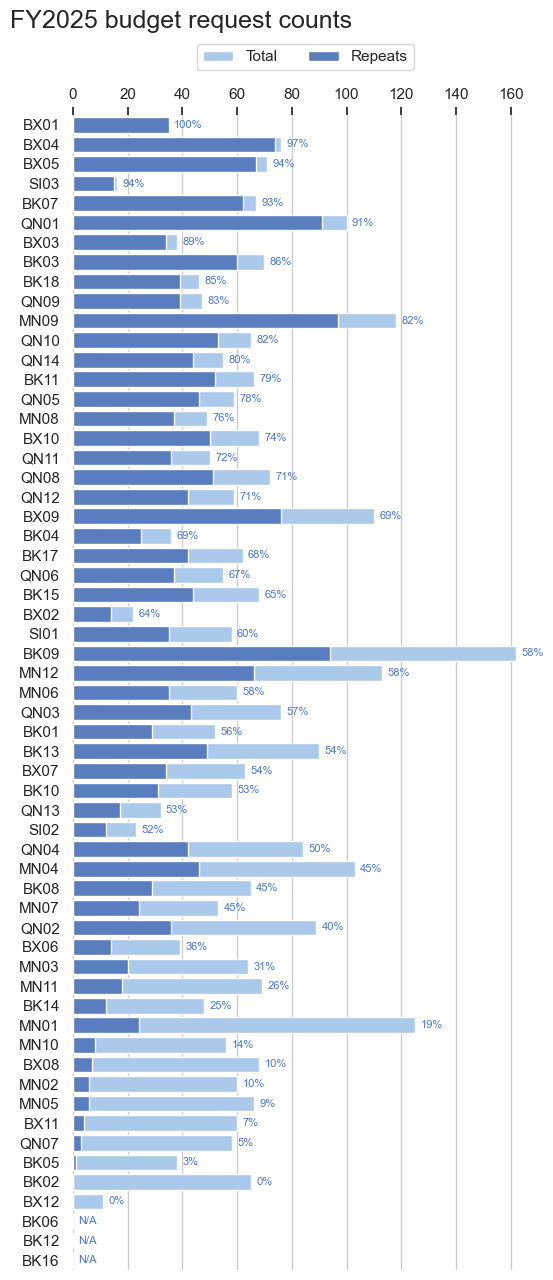

In [114]:
repeat_request_counts_barplot(request_counts_sorted, "FY2025 budget request counts")

In [115]:
cb_labels = sorted(df_all["cb_label_clean"].unique())
print(cb_labels)

['BK01', 'BK02', 'BK03', 'BK04', 'BK05', 'BK06', 'BK07', 'BK08', 'BK09', 'BK10', 'BK11', 'BK12', 'BK13', 'BK14', 'BK15', 'BK16', 'BK17', 'BK18', 'BX01', 'BX02', 'BX03', 'BX04', 'BX05', 'BX06', 'BX07', 'BX08', 'BX09', 'BX10', 'BX11', 'BX12', 'MN01', 'MN02', 'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10', 'MN11', 'MN12', 'QN01', 'QN02', 'QN03', 'QN04', 'QN05', 'QN06', 'QN07', 'QN08', 'QN09', 'QN10', 'QN11', 'QN12', 'QN13', 'QN14', 'SI01', 'SI02', 'SI03']


In [116]:
request_similarities_by_cb = calculate_request_similarities_by_cb(df_all, cb_labels)
request_similarities_by_cb

Calculating similarity of CB BK01 ...
Comparing 52 FY2025 requests to 56 FY2024 requests
Calculating similarity of CB BK02 ...
Comparing 65 FY2025 requests to 66 FY2024 requests
Calculating similarity of CB BK03 ...
Comparing 70 FY2025 requests to 72 FY2024 requests
Calculating similarity of CB BK04 ...
Comparing 36 FY2025 requests to 37 FY2024 requests
Calculating similarity of CB BK05 ...
Comparing 38 FY2025 requests to 55 FY2024 requests
Calculating similarity of CB BK06 ...
Comparing 0 FY2025 requests to 59 FY2024 requests
One of the versions ['FY2025', 'FY2024'] has no requests, cannot compute similarities
Calculating similarity of CB BK07 ...
Comparing 67 FY2025 requests to 67 FY2024 requests
Calculating similarity of CB BK08 ...
Comparing 65 FY2025 requests to 58 FY2024 requests
Calculating similarity of CB BK09 ...
Comparing 162 FY2025 requests to 116 FY2024 requests
Calculating similarity of CB BK10 ...
Comparing 58 FY2025 requests to 60 FY2024 requests
Calculating similarity 

,id_a,id_b,similarity,cb_label
0,FY2025BK01|Assign additional building inspecto...,FY2024BK01|Address traffic congestion|Request:...,0.0,BK01
1,FY2025BK01|Assign additional building inspecto...,FY2024BK01|Assign additional building inspecto...,1.0,BK01
2,FY2025BK01|Assign additional building inspecto...,FY2024BK01|Clean catch basins|Catchbasincleani...,0.0,BK01
3,FY2025BK01|Assign additional building inspecto...,FY2024BK01|Conduct traffic or parking studies|...,0.0,BK01
4,FY2025BK01|Assign additional building inspecto...,FY2024BK01|Enhance park safety through more se...,0.0,BK01
...,...,...,...,...
603,FY2025SI03|Reconstruct streets|Allocatefundsfo...,FY2024SI03|Reconstruct streets|HWR1140CRequest...,0.0,SI03
604,FY2025SI03|Reconstruct streets|Allocatefundsfo...,FY2024SI03|Repair or construct new curbs or pe...,0.0,SI03
605,FY2025SI03|Reconstruct streets|Allocatefundsfo...,FY2024SI03|Repair or construct new curbs or pe...,0.0,SI03
606,FY2025SI03|Reconstruct streets|Allocatefundsfo...,FY2024SI03|Repair or construct new curbs or pe...,0.0,SI03


In [ ]:
# def aggregations(df):
#     names = {
#         "requests_total": df["request_id"].count(),
#         "requests_FY2024": df[df["version"] == "FY2024"]["request_id"].count(),
#         "requests_FY2025": df[df["version"] == "FY2025"]["request_id"].count(),
#         "repeat_requests_FY2025": df[
#             (df["version"] == "FY2025") & (df[repeat_request_column])
#         ]["request_id"].count(),
#     }

#     return pd.Series(names)


# request_similarity_counts = request_similarities_by_cb.groupby("cb_label").apply(
#     aggregations
# )
request_similarity_counts = request_similarities_by_cb.groupby("cb_label").apply(
    lambda df: pd.Series(
        {
            "similarity_scores": df["cb_label"].count(),
            "perfect_scores": df[df["similarity"] == 1]["similarity"].count(),
            "high_scores": df[(df["similarity"] >= 0.5) & (df["similarity"] != 1)][
                "similarity"
            ].count(),
            # "requests_FY2025": df[df["version"] == "FY2025"]["request_id"].count(),
            # "repeat_requests_FY2025": df[
            #     (df["version"] == "FY2025") & (df[repeat_request_column])
            # ]["request_id"].count(),
        }
    )
)
request_similarity_counts

In [ ]:
request_counts_and_similarities = request_counts.merge(
    request_similarity_counts, left_on="cb_label_clean", right_on="cb_label"
)

# request_counts_and_similarities["concern"] = (
#     request_counts_and_similarities["repeat_requests_FY2025"]
#     != request_counts_and_similarities["perfect_scores"]
# )
request_counts_and_similarities["percent_high_scores"] = round(
    request_counts_and_similarities["high_scores"]
    / request_counts_and_similarities["requests_FY2025"]
    * 100
)
request_counts_and_similarities

In [ ]:
bk16 = request_similarities_by_cb[request_similarities_by_cb["cb_label"] == "BK16"]
bk16

In [ ]:
similarity_heatmap(
        data=data,
        title=f"CBBR request similarities ({cb}, FY2025 vs FY2024)",
        y_label="FY2025",
        x_label="FY2024",
    )

In [ ]:
for cb in sorted(request_similarities_by_cb["cb_label"].unique()):
    data = request_similarities_by_cb[request_similarities_by_cb["cb_label"] == cb]
    similarity_heatmap(
        data=data,
        title=f"CBBR request similarities ({cb}, FY2025 vs FY2024)",
        y_label="FY2025",
        x_label="FY2024",
    )